In [1]:
from glob import glob
import os

import cv2

from tools.functions import *

import pyperclip

from scipy import signal
import scipy
import seaborn as sns
import json
from glob import glob
import pandas as pd

import numpy as np
from importlib import reload
from tools.functions import *

from cmdstanpy import CmdStanModel
import arviz as az

c:\Users\lehtona6\.conda\envs\stan\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Segmentation

In [3]:
#root = "D:/instru_projects/timeseries/210821_2mgml_2500cellml_ibidi"

root = "D:/instru_projects/timeseries/IPN_tuned/230921_IPN15_2mgml_square"

figs = glob(os.path.join(root,"*/*/600h/*.tif"))
print("Total number of images: ", len(figs))

Total number of images:  62


In [774]:
print(fig_path)
pyperclip.copy(fig_path)

D:/instru_projects/timeseries/IPN_tuned/230921_IPN15_2mgml_square\MCF10A_DCIS_COm\40mM\120h\10x_8.tif


In [4]:
#index of analae 6
indexImg = 0 #index of image
indexCell = 0
fig_path = figs[indexImg]

currentFrame = cv2.imread(fig_path)
edges, final_boundaries = faridFilter(currentFrame, filterCoef=5)


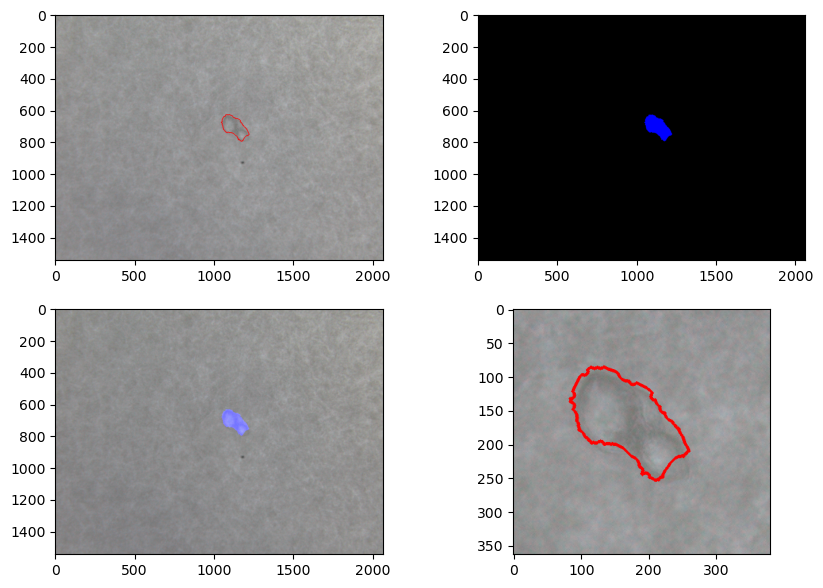

In [777]:
cutThreshold = 99.75e-2
fig, area, perimeter, largest, mask = segmentImg(currentFrame, edges, final_boundaries, cutThreshold, -1)

In [778]:
saver(root, fig_path, area, perimeter, final_boundaries, cutThreshold, indexCell, fig, mask, indexImg)

## Download data and plot the areas

In [3]:
files = [
        "D:/instru_projects/timeseries/Collagen/230719_2mgml_2500cellsml_squarewells/results",
        "D:/instru_projects/timeseries/Collagen/230821_2mgml_2500cellml_ibidi/results",
        "D:/instru_projects/timeseries/IPN_org/230315_COL00_2mgml_2500celml_squarewells/results",
        "D:/instru_projects/timeseries/IPN_org/230414_COL00_2mgml_2500celml_squarewells/results",
        "D:/instru_projects/timeseries/IPN_tuned/230830_IPN15_2mgml_2500cellml_sqaurewells/results",
        "D:/instru_projects/timeseries/IPN_tuned/230907_IPN15_2mgml_2500cellsml_sqaurewells/results",
        "D:/instru_projects/timeseries/IPN_tuned/230921_IPN15_2mgml_square/results"
]

types = ["collagen", "collagen", "IPN 1", "IPN 1", "IPN 2", "IPN 2", "IPN 2"]

In [8]:
save = True

for count, file in enumerate(files):
    ## Load files 
    root = file
    paths_json = glob(os.path.join(root,"*/*/*/*.json"))
    paths = glob(os.path.join(root,"*/*/*/*.npy"))
    paths = np.concatenate((paths, paths_json))
    print("Data length: ", len(paths))

    data_dict = pipe(paths, 1)
    df = parse_dict(data_dict)
    df["sample_type"] = types[count]
    if save:
        df_save = df.drop(["pw_tot"], axis = 1)
        try:
            df_save.to_csv(os.path.join("./data", "df_{}.csv".format(files[count].split("/")[-2])))
        except:
            pass
    if count == 0:
        df_all = df
    else:
        df_all = pd.concat((df_all, df))


Data length:  641
time
conc
condition
areas
label
perimeter
day
expr
ending
pixelSize
pw_tot
Data length:  152
time
conc
condition
areas
label
perimeter
day
expr
ending
pixelSize
pw_tot


ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 645 and the array at index 1 has size 152

C:\Users\lehtona6\AppData\Local\Temp\ipykernel_18768\797184003.py:23: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for count, i in (df_final.groupby(["ID"])):
C:\Users\lehtona6\AppData\Local\Temp\ipykernel_18768\80097966.py:49: RuntimeWarning: divide by zero encountered in divide
  return 2*S**2*P**2*(np.exp(-x/P) + x/P - 1)
C:\Users\lehtona6\AppData\Local\Temp\ipykernel_18768\80097966.py:49: RuntimeWarning: invalid value encountered in divide
  return 2*S**2*P**2*(np.exp(-x/P) + x/P - 1)
C:\Users\lehtona6\AppData\Local\Temp\ipykernel_18768\80097966.py:49: RuntimeWarning: invalid value encountered in multiply
  return 2*S**2*P**2*(np.exp(-x/P) + x/P - 1)
C:\Users\lehtona6\AppData\Local\Temp\ipykernel_18768\80097966.py:49: RuntimeWarning: overflow encountered in exp
  return 2*S**2*P**2*(np.exp(-x/P) + x/P - 1)
c:

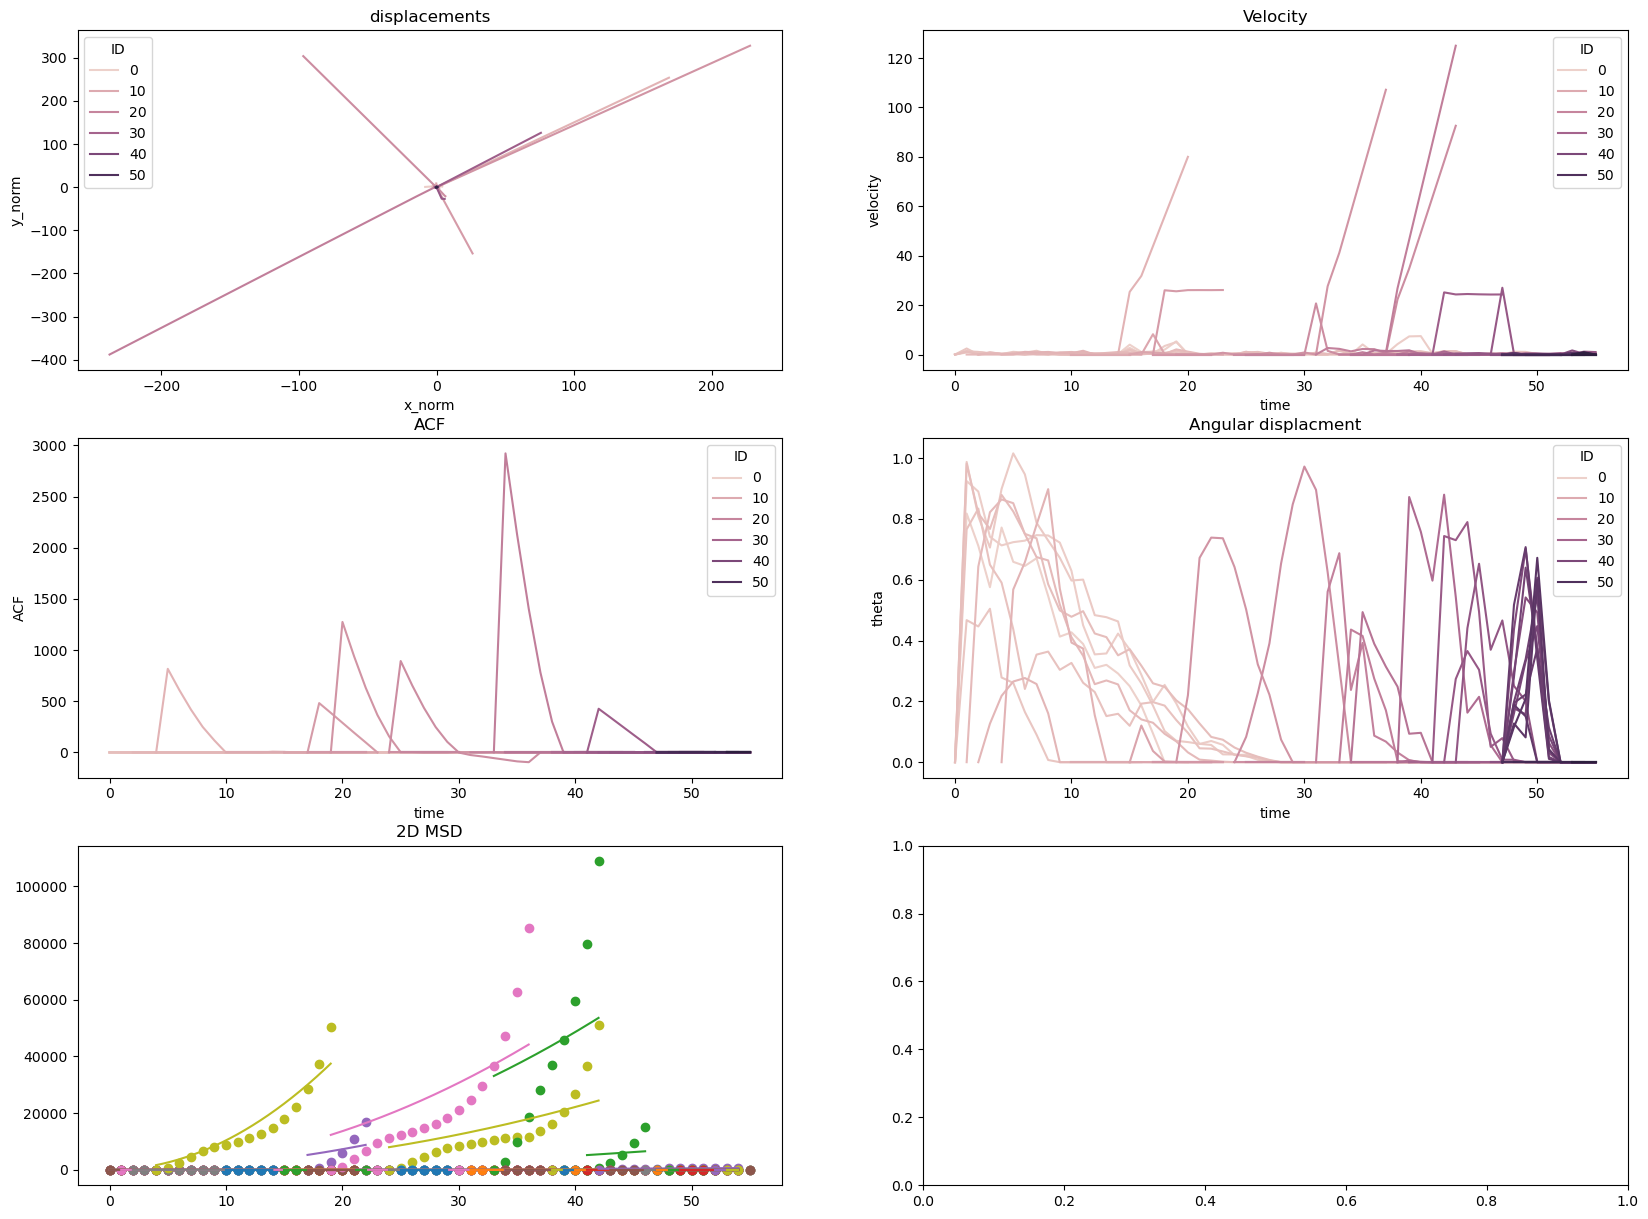

C:\Users\lehtona6\AppData\Local\Temp\ipykernel_18768\797184003.py:39: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for count, i in (df_final.groupby(["ID"])):


Text(0.5, 0, 'z-coordinate (um)')

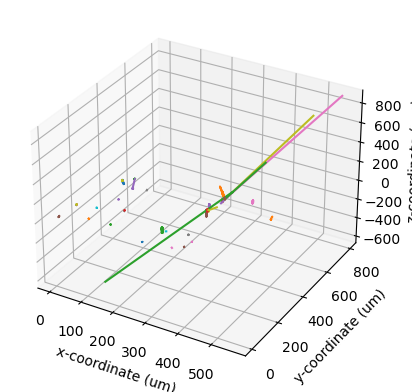

In [ ]:


fig, ax = plt.subplots(ncols=2,nrows = 3, figsize=(20, 15))

sns.lineplot(x = "x_norm", y = "y_norm", data = df, hue = "ID", ax = ax[0,0])
ax[0,0].set_title("displacements")


sns.lineplot(x = "time", y = "velocity_2D", data = df, hue = "ID", ax = ax[0,1])
ax[0,1].set_title("Velocity")


sns.lineplot(x = "time", y = "ACF", data = df, hue = "ID", ax = ax[1,0])
ax[1,0].set_title("ACF")


sns.lineplot(x = "time", y = "theta", data = df, hue = "ID", ax = ax[1,1])
ax[1,1].set_title("Angular displacment")

for count, i in (df.groupby(["ID"])):
    ax[2,0].scatter(i["time"], i["MSD"], label = "track_{}".format(count))
    popt, pcov, tau_pred, MSD_pred, diffusion_coef = MSD_2D(i["MSD"].values[:-1], i["time"].values[:-1])
    ax[2,0].plot(tau_pred, MSD_pred, label = "Fit")

#ax[2,0].legend()
ax[2,0].set_title("2D MSD")
#print("2D MSD" *popt, " Diff: ",  diffusion_coef)
plt.show()


fig = plt.figure()
ax = plt.axes(projection='3d')

for count, i in (df_final.groupby(["ID"])):
    ax.plot(i["x"],i["y"],i["z"]*10, label =  "track_{}".format(count))

ax.set_xlabel("x-coordinate (um)")
ax.set_ylabel("y-coordinate (um)")
ax.set_zlabel("z-coordinate (um)")

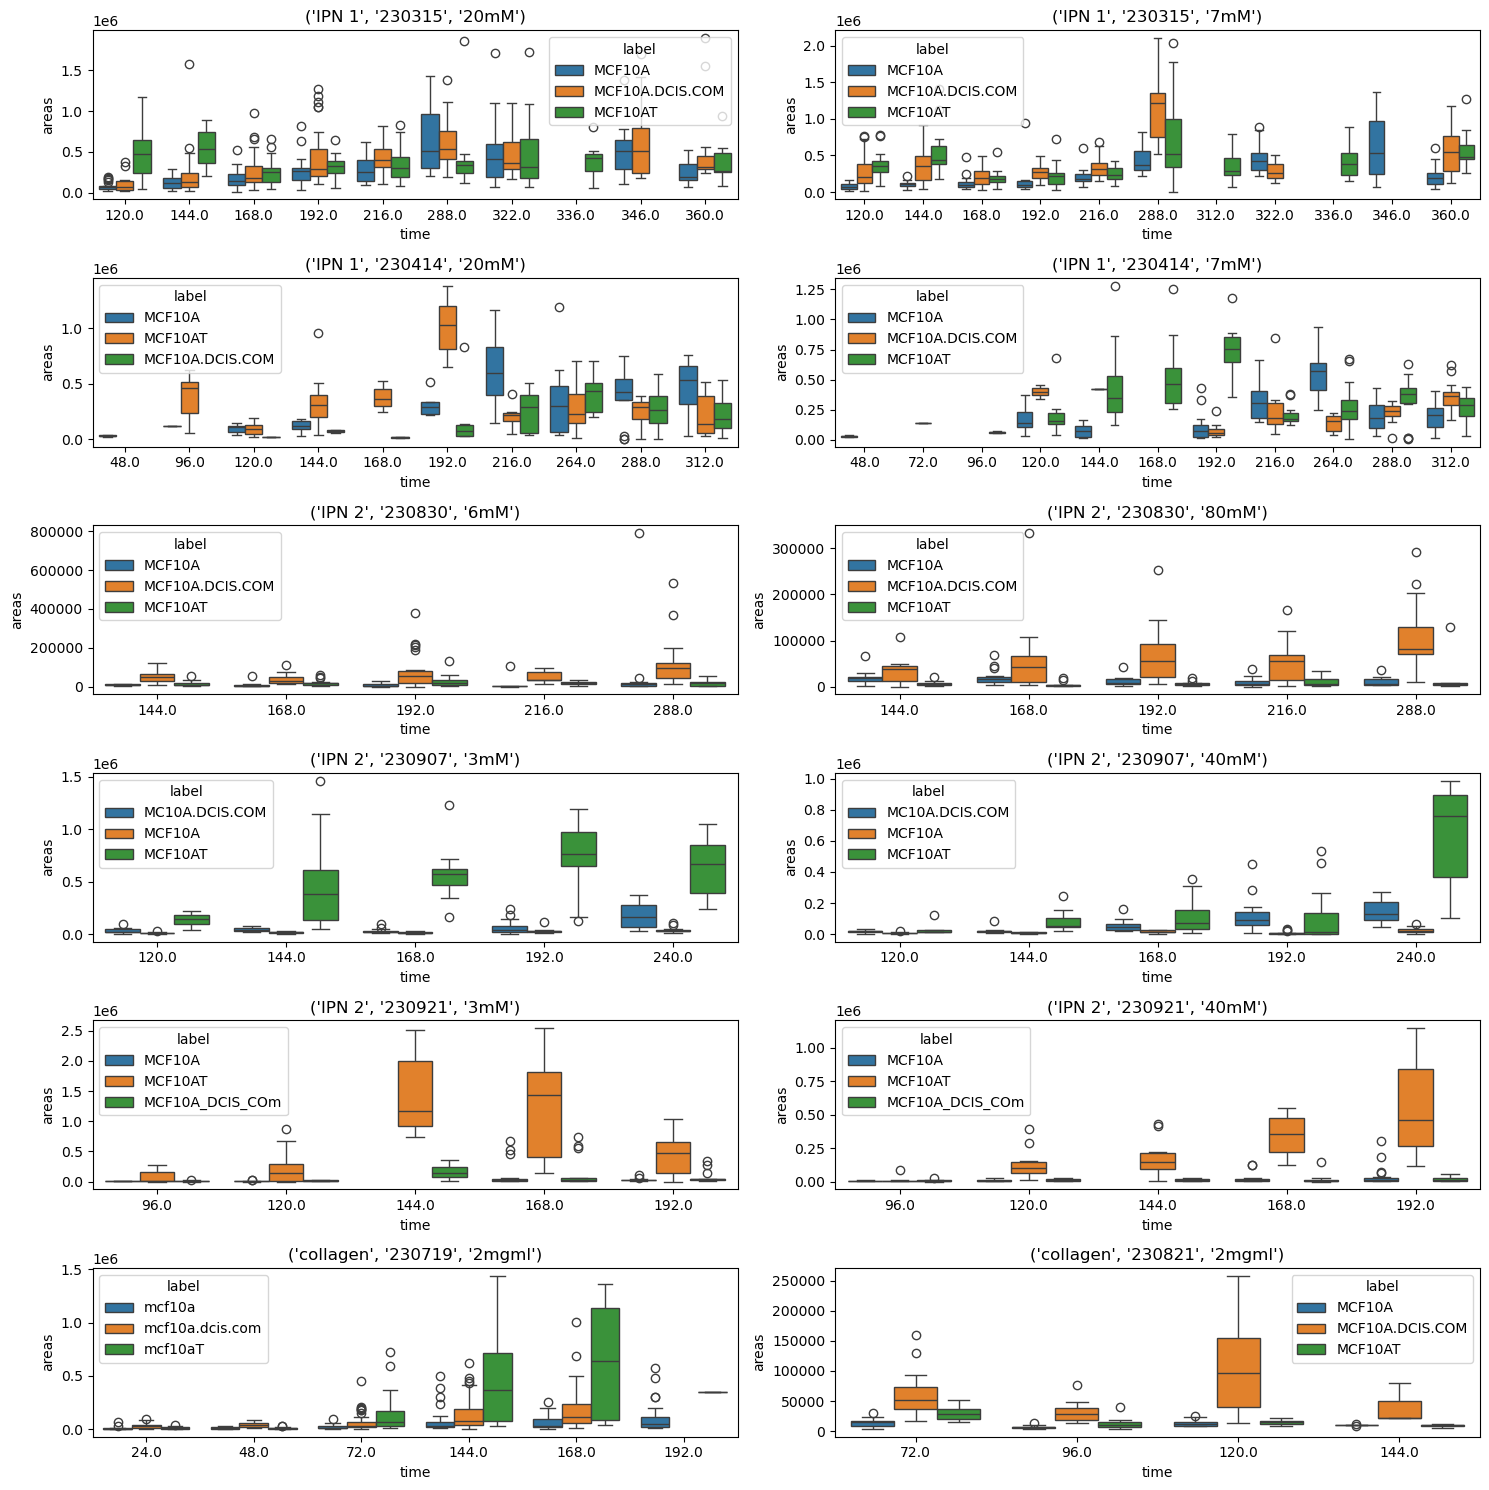

In [4]:
fig,ax = plt.subplots(6,2,figsize=(15,15), facecolor='white')

column = 0
row = 0

for count,i in enumerate(df_all.groupby(["sample_type", "day", "condition"])):
    ax[row,column].set_title(i[0])
    sns.boxplot(x= "time", y = "areas", data = i[1], hue ="label", ax = ax[row, column])
    #ax[0,0].set_ylim([0,0.8e6])
    column += 1
    if column == 2:
        row += 1
        column = 0

fig.tight_layout()
fig.savefig("./data/summary_all.png")


In [ ]:
def create_growth_fits(df, name):
    

    #df = df[df["time"] != 192]
    labels = df["label"].unique()

    fig,ax = plt.subplots(2,2,figsize=(15,10))

    sns.boxplot(x= "time", y = "areas", data = df, hue ="label", ax = ax[0,0])
    ax[0,0].set_ylim([0,0.8e6])

    row = 0
    column = 1
    for count, i in enumerate(labels):

        current_df = df[df["label"] == i]

        area, scaler = norm(current_df["areas"].values)  
        time = normalize(current_df["time"])

        fit, stan_dict = fit_stan(time, area, i)
        #return fit
        xx, me, low, up, ax[row, column] = process_stan(fit, scaler, stan_dict, df, i, ax[row, column])

        if column == 1:
            row += 1
            column = 0
        else:
            column += 1

    fig.savefig(os.path.join("./data/", "df_{}_{}_{}.png".format(name[0],name[1],name[2])))


def fit_stan(time, area, name):

    x_hat = np.arange(time.min(), time.max(), 1e-1)
    stan_dict = {"N": len(area), 
        "area": area.tolist(), 
        "time": time.tolist(),
        "N_hat": len(x_hat),
        "x_hat": x_hat.tolist()}

    with open(os.path.join('./stan/data_{}.json'.format(name)),'w') as f:
        json.dump(stan_dict,f)

    model = CmdStanModel(stan_file = "./stan/curveFit.stan")
    fit = model.sample(data = './stan/data_{}.json'.format(name),adapt_delta =0.99)
    
    #print(fit.diagnose())

    return fit, stan_dict

def inv_scale(data, scaler):
    return scaler.inverse_transform(data)

def inv_scale_time(preds, org_time):

    mean = org_time.mean()
    std = org_time.std()

    return preds*std+mean

def process_stan(fit, scaler, stand_dict, df, label, ax):

    azOut = az.from_cmdstanpy(posterior=fit,
                            posterior_predictive='y_hat',
                            log_likelihood='log_lik',
                            observed_data={'area': stand_dict["area"]})
    
    #_ = az.plot_posterior(azOut)
    #plt.show()
    #_ = az.plot_trace(azOut)
    #plt.show()

    noise = np.mean(azOut.posterior_predictive["y_hat"], axis=0)

    noise = inv_scale(noise,scaler)

    me = np.percentile(noise,50,axis=0)
    low = np.percentile(noise,5,axis=0)
    up = np.percentile(noise,95,axis=0)

    xx = inv_scale_time(np.array(stand_dict["x_hat"]),df[df["label"] == label]["time"])

    ax.fill_between(xx,low,up,color='crimson',alpha=0.3)
    ax.plot(xx,me,color='crimson', label='Fit')
    ax.scatter(df["time"],df["areas"], label = "Detected data")

    ax.legend()
    ax.set_title("Growth Curve: {}".format(label))
    ax.set_xlabel("time (hours)")
    ax.set_ylabel("Area (um)")
    ax.set_ylim([0,me.max()*1.75])
    #plt.show()

    return xx, me, low, up, ax



22:25:27 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)

chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)



chain 1 |██▎       | 00:00 Iteration:  300 / 2000 [ 15%]  (Warmup)

chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)

chain 1 |███▋      | 00:00 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████▌     | 00:01 Iteration:  800 / 2000 [ 40%]  (Warmup)

chain 1 |█████▍    | 00:01 Iteration: 1000 / 2000 [ 50%]  (Warmup)

chain 1 |██████▎   | 00:01 Iteration: 1100 / 2000 [ 55%]  (Sampling)




chain 1 |███████▎  | 00:01 Iteration: 1300 / 2000 [ 65%]  (Sampling)



chain 1 |████████▏ | 00:02 Iteration: 1500 / 2000 [ 75%]  (Sampling)

chain 1 |████████▋ | 00:02 Iteration: 1600 / 2000 [ 80%]  (Sampling)


chain 1 |█████████ | 00:02 Iteration: 1700 / 2000 [ 85%]  (Sampling)


chain 1 |█████████▌| 00:02 Iteration: 1800 / 2000 [ 90%]  (Sampling)




22:25:30 - cmdstanpy - INFO - CmdStan done processing.
22:25:30 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'C:/Users/lehtona6/codes/InstruProject/incubationSeries/stan/curveFit.stan', line 43, column 3 to column 35)
Consider re-running with show_console=True if the above output is unclear!


22:25:31 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status




chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)
chain 1 |██▎       | 00:00 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▏      | 00:01 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |███▋      | 00:01 Iteration:  600 / 2000 [ 30%]  (Warmup)

chain 1 |████      | 00:01 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:01 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████     | 00:01 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:01 Iteration: 1001 / 2000 [ 50%]  (Sampling)



chain 1 |██████▎   | 00:02 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   | 00:02 Iteration: 1200 / 2000 [ 60%]  (Sampling)



chain 1 |███████▎  | 00:02 Iteration: 1300 / 2000 [ 65%]  (Sampling)


cha


22:25:35 - cmdstanpy - INFO - CmdStan done processing.
22:25:35 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'C:/Users/lehtona6/codes/InstruProject/incubationSeries/stan/curveFit.stan', line 43, column 3 to column 35)
Consider re-running with show_console=True if the above output is unclear!


22:25:35 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 1 divergent transitions (0.1%)
	Chain 2 had 3 divergent transitions (0.3%)
	Use function "diagnose()" to see further information.
22:25:36 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)




chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▎       | 00:00 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |███▏      | 00:00 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |███▋      | 00:00 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████      | 00:01 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:01 Iteration:  800 / 2000 [ 40%]  (Warmup)



chain 1 |█████     | 00:01 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:01 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:01 Iteration: 1100 / 2000 [ 55%]  (Samplin


22:25:39 - cmdstanpy - INFO - CmdStan done processing.
22:25:39 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'C:/Users/lehtona6/codes/InstruProject/incubationSeries/stan/curveFit.stan', line 43, column 3 to column 35)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'C:/Users/lehtona6/codes/InstruProject/incubationSeries/stan/curveFit.stan', line 43, column 3 to column 35)
Consider re-running with show_console=True if the above output is unclear!


22:25:39 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 2 had 1 divergent transitions (0.1%)
	Chain 3 had 5 divergent transitions (0.5%)
	Chain 4 had 12 divergent transitions (1.2%)
	Use function "diagnose()" to see further information.
22:25:41 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)
chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)



chain 1 |███▋      | 00:00 Iteration:  600 / 2000 [ 30%]  (Warmup)

chain 1 |████      | 00:01 Iteration:  700 / 2000 [ 35%]  (Warmup)




chain 1 |█████     | 00:01 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:01 Iteration: 1001 / 2000 [ 50%]  (Sampling)






chain 1 |██████▊   | 00:01 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▎  | 00:01 Iteration: 1300 / 2000 [ 65%]  (Sampling)


chain 1 |███████▋  | 00:02 Iteration: 1400 / 2000 [ 70%]  (Sampling)

chain 1 |███


22:25:44 - cmdstanpy - INFO - CmdStan done processing.
22:25:44 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'C:/Users/lehtona6/codes/InstruProject/incubationSeries/stan/curveFit.stan', line 43, column 3 to column 35)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'C:/Users/lehtona6/codes/InstruProject/incubationSeries/stan/curveFit.stan', line 43, column 3 to column 35)
Exception: normal_lpdf: Location parameter[1] is nan, but must be finite! (in 'C:/Users/lehtona6/codes/InstruProject/incubationSeries/stan/curveFit.stan', line 43, column 3 to column 35)
Consider re-running with show_console=True if the above output is unclear!


22:25:44 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 3 divergent transitions (0.3%)
	Chain 2 had 1 divergent transitions (0.1%)
	Chain 3 had 1 divergent transitions (0.1%)
	Chain 4 had 5 divergent transitions (0.5%)
	Use function "diagnose()" to see further information.
22:25:45 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)

chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)





chain 1 |███▋      | 00:00 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████      | 00:01 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:01 Iteration:  800 / 2000 [ 40%]  (Warmup)



chain 1 |█████▉    | 00:01 Iteration: 1001 / 2000 [ 50%]  (Sampling)

chain 1 |██████▎   | 00:01 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |███████▎  | 00:01 Iteration: 1300 


22:25:49 - cmdstanpy - INFO - CmdStan done processing.
22:25:49 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'C:/Users/lehtona6/codes/InstruProject/incubationSeries/stan/curveFit.stan', line 43, column 3 to column 35)
Consider re-running with show_console=True if the above output is unclear!


22:25:49 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 36 divergent transitions (3.6%)
	Chain 2 had 33 divergent transitions (3.3%)
	Chain 3 had 22 divergent transitions (2.2%)
	Chain 4 had 28 divergent transitions (2.8%)
	Use function "diagnose()" to see further information.
22:25:50 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)





chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)

chain 1 |██▎       | 00:00 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▏      | 00:01 Iteration:  500 / 2000 [ 25%]  (Warmup)



chain 1 |████▌     | 00:01 Iteration:  800 / 2000 [ 40%]  (Warmup)
chain 1 |█████     | 00:01 Iteration:  900 / 2000 [ 45%]  (Warmup)

chain 1 |█████▉    | 00:01 Iteration: 1001 / 2000 [ 50%]  (Sampling)
chain 1 |██████▊   | 00:01 Iteration: 1200 / 200


22:25:59 - cmdstanpy - INFO - CmdStan done processing.
22:25:59 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'C:/Users/lehtona6/codes/InstruProject/incubationSeries/stan/curveFit.stan', line 43, column 3 to column 35)
Consider re-running with show_console=True if the above output is unclear!


22:25:59 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 35 divergent transitions (3.5%)
	Chain 2 had 29 divergent transitions (2.9%)
	Chain 3 had 36 divergent transitions (3.6%)
	Chain 4 had 27 divergent transitions (2.7%)
	Use function "diagnose()" to see further information.
22:26:01 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)




chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)

chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▋      | 00:00 Iteration:  600 / 2000 [ 30%]  (Warmup)
chain 1 |████▌     | 00:00 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)





chain 1 |██████▊   | 00:01 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▋  | 00:01 Iteration: 1400 / 2000 [ 70%]  (Sampling)

chain 1 |████████▋ | 00:01 Iteration: 160


22:26:03 - cmdstanpy - INFO - CmdStan done processing.
22:26:03 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'C:/Users/lehtona6/codes/InstruProject/incubationSeries/stan/curveFit.stan', line 43, column 3 to column 35)
Consider re-running with show_console=True if the above output is unclear!


22:26:03 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)



chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▋      | 00:00 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████▌     | 00:00 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)

chain 1 |██████▊   | 00:00 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▋  | 00:01 Iteration: 1400 / 2000 [ 70%]  (Sampling)



chain 1 |████████▋ | 00:01 Iteration: 1600 / 2000 [ 80%]  (Sampling)


chain 1 |█████████▌| 00:01 Iteration: 1800 / 2000 [ 90%]  (Sampling)


chain 1 |██████████| 00:01 Sampling completed                       
chain 2 |██████████| 00:01 Sampling completed                       
chain 3 |██████████| 00:01 Sampling completed                       
c


22:26:05 - cmdstanpy - INFO - CmdStan done processing.
22:26:06 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 3 divergent transitions (0.3%)
	Chain 2 had 6 divergent transitions (0.6%)
	Chain 3 had 4 divergent transitions (0.4%)
	Chain 4 had 2 divergent transitions (0.2%)
	Use function "diagnose()" to see further information.


22:26:06 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)




chain 1 |█████     | 00:00 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▊   | 00:01 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▋  | 00:01 Iteration: 1400 / 2000 [ 70%]  (Sampling)




chain 1 |████████▋ | 00:01 Iteration: 1600 / 2000 [ 80%]  (Sampling)


chain 1 |█████████ | 00:01 Iteration: 1700 / 2000 [ 85%]  (Sampling)

chain 1 |█████████▌| 00:01 Iteration: 1800 / 2000 [ 90%]  (Sampling)


chain 1 |██████████| 00:02 Iteration: 1900 / 2000 [ 95%]  (Sampling)








chain 1 |██████████| 00:03 Sampling completed                       
chain 2 |██████████| 00:03 Sampling completed             


22:26:10 - cmdstanpy - INFO - CmdStan done processing.
22:26:10 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'C:/Users/lehtona6/codes/InstruProject/incubationSeries/stan/curveFit.stan', line 43, column 3 to column 35)
Consider re-running with show_console=True if the above output is unclear!
22:26:10 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 14 divergent transitions (1.4%)
	Chain 2 had 4 divergent transitions (0.4%)
	Chain 3 had 12 divergent transitions (1.2%)
	Chain 4 had 1 divergent transitions (0.1%)
	Use function "diagnose()" to see further information.


22:26:11 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)

chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▋      | 00:00 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |█████     | 00:00 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |██████▎   | 00:00 Iteration: 1100 / 2000 [ 55%]  (Sampling)
chain 1 |███████▎  | 00:00 Iteration: 1300 / 2000 [ 65%]  (Sampling)


chain 1 |████████▏ | 00:01 Iteration: 1500 / 2000 [ 75%]  (Sampling)


chain 1 |█████████ | 00:01 Iteration: 1700 / 2000 [ 85%]  (Sampling)

chain 1 |██████████| 00:01 Iteration: 1900 / 2000 [ 95%]  (Sampling)






chain 1 |██████████| 00:01 Sampling completed                       
chain 2 |██████████| 00:01 Sampling completed                       
chain 3 |██████████| 00:01 Sampling completed                       
ch


22:26:13 - cmdstanpy - INFO - CmdStan done processing.
22:26:13 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 12 divergent transitions (1.2%)
	Chain 2 had 6 divergent transitions (0.6%)
	Chain 3 had 4 divergent transitions (0.4%)
	Use function "diagnose()" to see further information.


22:26:14 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)




chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)
chain 1 |███▋      | 00:00 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████▌     | 00:00 Iteration:  800 / 2000 [ 40%]  (Warmup)
chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |███████▎  | 00:00 Iteration: 1300 / 2000 [ 65%]  (Sampling)

chain 1 |████████▏ | 00:00 Iteration: 1500 / 2000 [ 75%]  (Sampling)


chain 1 |█████████ | 00:01 Iteration: 1700 / 2000 [ 85%]  (Sampling)


chain 1 |██████████| 00:01 Iteration: 1900 / 2000 [ 95%]  (Sampling)







chain 1 |██████████| 00:01 Sampling completed                       
chain 2 |██████████| 00:01 Sampling completed                       
chain 3 |██████████| 00:01 Sampling completed                       
chain 4 |██████████| 00:01 Sampling completed                       


22:26:15 - cmdstanpy - INFO - CmdStan done processing.
22:26:15 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/lehtona6/codes/InstruProject/incubationSeries/stan/curveFit.stan', line 43, column 3 to column 35)
Consider re-running with show_console=True if the above output is unclear!
22:26:15 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 14 divergent transitions (1.4%)
	Chain 2 had 13 divergent transitions (1.3%)
	Chain 3 had 8 divergent transitions (0.8%)
	Chain 4 had 18 divergent transitions (1.8%)
	Use function "diagnose()" to see further information.


22:26:16 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)

chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)
chain 1 |██▎       | 00:00 Iteration:  300 / 2000 [ 15%]  (Warmup)

chain 1 |███▏      | 00:00 Iteration:  500 / 2000 [ 25%]  (Warmup)
chain 1 |████      | 00:00 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |█████     | 00:00 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:01 Iteration: 1001 / 2000 [ 50%]  (Sampling)





chain 1 |██████▊   | 00:01 Iteration: 1200 / 2000 [ 60%]  (Sampling)





chain 1 |███████▋  | 00:01 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 1 |████████▏ | 00:01 Iteration: 1500 / 2000 [ 75%]  (Sampling)


chain 1 |████████▋ | 00:02 Iteration: 1600 / 2000 [ 80%]  (Sampling)
chain 1 |█████████ | 00:02 Iteration: 1700 / 2000 [ 85%]  (Sampling)
chain 1 |█████████▌| 00:02 Iteration: 1800 / 2000 [ 90%]  (Sampling)
c


22:26:19 - cmdstanpy - INFO - CmdStan done processing.
22:26:19 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 20 divergent transitions (2.0%)
	Chain 2 had 9 divergent transitions (0.9%)
	Chain 3 had 23 divergent transitions (2.3%)
	Chain 4 had 41 divergent transitions (4.1%)
	Use function "diagnose()" to see further information.


22:26:20 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status






chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |██▎       | 00:00 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |███▏      | 00:00 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |█████     | 00:00 Iteration:  900 / 2000 [ 45%]  (Warmup)

chain 1 |██████▎   | 00:00 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |███████▋  | 00:00 Iteration: 1400 / 2000 [ 70%]  (Sampling)

chain 1 |██████████| 00:01 Sampling completed                       
chain 2 |██████████| 00:01 Sampling completed                       
chain 3 |██████████| 00:01 Sampling completed                       
chain 4 |██████████| 00:01 Sampling completed                       


22:26:22 - cmdstanpy - INFO - CmdStan done processing.
22:26:22 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Location parameter[1] is nan, but must be finite! (in 'C:/Users/lehtona6/codes/InstruProject/incubationSeries/stan/curveFit.stan', line 43, column 3 to column 35)
Consider re-running with show_console=True if the above output is unclear!
22:26:22 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 7 divergent transitions (0.7%)
	Chain 2 had 4 divergent transitions (0.4%)
	Chain 3 had 4 divergent transitions (0.4%)
	Chain 4 had 11 divergent transitions (1.1%)
	Use function "diagnose()" to see further information.


22:26:22 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |██▎       | 00:00 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |█████     | 00:00 Iteration:  900 / 2000 [ 45%]  (Warmup)

chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)





chain 1 |██████▊   | 00:00 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▋  | 00:01 Iteration: 1400 / 2000 [ 70%]  (Sampling)





chain 1 |████████▋ | 00:01 Iteration: 1600 / 2000 [ 80%]  (Sampling)


chain 1 |█████████▌| 00:01 Iteration: 1800 / 2000 [ 90%]  (Sampling)
chain 1 |██████████| 00:01 Sampling completed                       
chain 2 |██████████| 00:01 Sampling completed                       
chain 3 |██████████| 00:01 Sampling completed                       
chain 4 |██████████| 00:01 Sampling completed                       


22:26:24 - cmdstanpy - INFO - CmdStan done processing.
22:26:24 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'C:/Users/lehtona6/codes/InstruProject/incubationSeries/stan/curveFit.stan', line 43, column 3 to column 35)
Consider re-running with show_console=True if the above output is unclear!
22:26:24 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 1 divergent transitions (0.1%)
	Chain 2 had 3 divergent transitions (0.3%)
	Chain 3 had 5 divergent transitions (0.5%)
	Chain 4 had 4 divergent transitions (0.4%)
	Use function "diagnose()" to see further information.


22:26:25 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)



chain 1 |████      | 00:00 Iteration:  700 / 2000 [ 35%]  (Warmup)

chain 1 |█████     | 00:00 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |██████▎   | 00:00 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |███████▎  | 00:01 Iteration: 1300 / 2000 [ 65%]  (Sampling)




chain 1 |████████▏ | 00:01 Iteration: 1500 / 2000 [ 75%]  (Sampling)


chain 1 |█████████ | 00:01 Iteration: 1700 / 2000 [ 85%]  (Sampling)


chain 1 |██████████| 00:01 Iteration: 1900 / 2000 [ 95%]  (Sampling)


chain 1 |██████████| 00:01 Sampling completed                       
chain 2 |██████████| 00:01 Sampling completed                       
chain 3 |██████████| 00:01 Sampling completed                       



22:26:26 - cmdstanpy - INFO - CmdStan done processing.
22:26:26 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/lehtona6/codes/InstruProject/incubationSeries/stan/curveFit.stan', line 43, column 3 to column 35)
Consider re-running with show_console=True if the above output is unclear!
22:26:27 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 4 had 6 divergent transitions (0.6%)
	Use function "diagnose()" to see further information.


22:26:28 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status



chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)

chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |███▏      | 00:00 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |████      | 00:00 Iteration:  700 / 2000 [ 35%]  (Warmup)




chain 1 |█████     | 00:00 Iteration:  900 / 2000 [ 45%]  (Warmup)



chain 1 |██████▎   | 00:00 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |███████▎  | 00:01 Iteration: 1300 / 2000 [ 65%]  (Sampling)

chain 1 |████████▏ | 00:01 Iteration: 1500 / 2000 [ 75%]  (Sampling)

chain 1 |█████████ | 00:01 Iteration: 1700 / 2000 [ 85%]  (Sampling)

chain 1 |██████████| 00:01 Iteration: 1900 / 2000 [ 95%]  (Sampling)

chain 1 |██████████| 00:01 Sampling completed                       
chain 2 |██████████| 00:01 Sampling completed
chain 3 |██████████| 00:01 Sampling completed                       
chain 4 |██████████| 00:01


22:26:30 - cmdstanpy - INFO - CmdStan done processing.
22:26:30 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 6 divergent transitions (0.6%)
	Chain 2 had 9 divergent transitions (0.9%)
	Chain 3 had 2 divergent transitions (0.2%)
	Chain 4 had 5 divergent transitions (0.5%)
	Use function "diagnose()" to see further information.


22:26:30 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)




chain 1 |████      | 00:00 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |█████▍    | 00:00 Iteration: 1000 / 2000 [ 50%]  (Warmup)



chain 1 |██████▊   | 00:00 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▋  | 00:01 Iteration: 1400 / 2000 [ 70%]  (Sampling)





chain 1 |████████▋ | 00:01 Iteration: 1600 / 2000 [ 80%]  (Sampling)
chain 1 |█████████▌| 00:01 Iteration: 1800 / 2000 [ 90%]  (Sampling)
chain 1 |██████████| 00:01 Sampling completed                       
chain 2 |██████████| 00:01 Sampling completed                       
chain 3 |██████████| 00:01 Sampling completed                       
chain 4 |██████████| 00:01 Sampling completed                       


22:26:32 - cmdstanpy - INFO - CmdStan done processing.
22:26:32 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'C:/Users/lehtona6/codes/InstruProject/incubationSeries/stan/curveFit.stan', line 43, column 3 to column 35)
Consider re-running with show_console=True if the above output is unclear!
22:26:32 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 3 divergent transitions (0.3%)
	Chain 3 had 2 divergent transitions (0.2%)
	Use function "diagnose()" to see further information.


22:26:33 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |████▌     | 00:00 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |██████▎   | 00:00 Iteration: 1100 / 2000 [ 55%]  (Sampling)



chain 1 |███████▋  | 00:00 Iteration: 1400 / 2000 [ 70%]  (Sampling)

chain 1 |█████████ | 00:00 Iteration: 1700 / 2000 [ 85%]  (Sampling)



chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


22:26:34 - cmdstanpy - INFO - CmdStan done processing.
22:26:34 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 14 divergent transitions (1.4%)
	Chain 2 had 1 divergent transitions (0.1%)
	Chain 3 had 2 divergent transitions (0.2%)
	Chain 4 had 1 divergent transitions (0.1%)
	Use function "diagnose()" to see further information.


22:26:35 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |███▏      | 00:00 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |█████     | 00:00 Iteration:  900 / 2000 [ 45%]  (Warmup)




chain 1 |██████▎   | 00:00 Iteration: 1100 / 2000 [ 55%]  (Sampling)



chain 1 |███████▋  | 00:00 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 1 |████████▋ | 00:01 Iteration: 1600 / 2000 [ 80%]  (Sampling)


chain 1 |█████████▌| 00:01 Iteration: 1800 / 2000 [ 90%]  (Sampling)
chain 1 |██████████| 00:01 Sampling completed                       
chain 2 |██████████| 00:01 Sampling completed                       
chain 3 |██████████| 00:01 Sampling completed                       
chain 4 |██████████| 00:01 Sampling completed                       


22:26:36 - cmdstanpy - INFO - CmdStan done processing.
22:26:36 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Location parameter[1] is nan, but must be finite! (in 'C:/Users/lehtona6/codes/InstruProject/incubationSeries/stan/curveFit.stan', line 43, column 3 to column 35)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'C:/Users/lehtona6/codes/InstruProject/incubationSeries/stan/curveFit.stan', line 43, column 3 to column 35)
Consider re-running with show_console=True if the above output is unclear!
22:26:36 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 3 divergent transitions (0.3%)
	Chain 2 had 3 divergent transitions (0.3%)
	Chain 3 had 9 divergent transitions (0.9%)
	Chain 4 had 1 divergent transitions (0.1%)
	Use function "diagnose()" to see further information.


22:26:37 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |████      | 00:00 Iteration:  700 / 2000 [ 35%]  (Warmup)

chain 1 |█████▍    | 00:00 Iteration: 1000 / 2000 [ 50%]  (Warmup)





chain 1 |██████▊   | 00:00 Iteration: 1200 / 2000 [ 60%]  (Sampling)




chain 1 |███████▋  | 00:01 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 1 |████████▋ | 00:01 Iteration: 1600 / 2000 [ 80%]  (Sampling)



chain 1 |█████████▌| 00:01 Iteration: 1800 / 2000 [ 90%]  (Sampling)
chain 1 |██████████| 00:01 Sampling completed                       
chain 2 |██████████| 00:01 Sampling completed                       
chain 3 |██████████| 00:01 Sampling completed                       
chain 4 |██████████| 00:01 Sampling completed                       


22:26:38 - cmdstanpy - INFO - CmdStan done processing.
22:26:38 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/lehtona6/codes/InstruProject/incubationSeries/stan/curveFit.stan', line 43, column 3 to column 35)
Consider re-running with show_console=True if the above output is unclear!
22:26:38 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 2 had 3 divergent transitions (0.3%)
	Chain 3 had 1 divergent transitions (0.1%)
	Use function "diagnose()" to see further information.


22:26:39 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)




chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |████      | 00:00 Iteration:  700 / 2000 [ 35%]  (Warmup)
chain 1 |█████▍    | 00:00 Iteration: 1000 / 2000 [ 50%]  (Warmup)


chain 1 |██████▊   | 00:00 Iteration: 1200 / 2000 [ 60%]  (Sampling)



chain 1 |███████▋  | 00:01 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 1 |████████▋ | 00:01 Iteration: 1600 / 2000 [ 80%]  (Sampling)

chain 1 |██████████| 00:01 Sampling completed                       
chain 2 |██████████| 00:01 Sampling completed                       
chain 3 |██████████| 00:01 Sampling completed                       
chain 4 |██████████| 00:01 Sampling completed                       


22:26:40 - cmdstanpy - INFO - CmdStan done processing.
22:26:40 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/lehtona6/codes/InstruProject/incubationSeries/stan/curveFit.stan', line 43, column 3 to column 35)
Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/lehtona6/codes/InstruProject/incubationSeries/stan/curveFit.stan', line 43, column 3 to column 35)
Consider re-running with show_console=True if the above output is unclear!
22:26:40 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 2 divergent transitions (0.2%)
	Use function "diagnose()" to see further information.


22:26:42 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status



chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▋      | 00:00 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████▌     | 00:00 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)





chain 1 |██████▊   | 00:01 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▋  | 00:01 Iteration: 1400 / 2000 [ 70%]  (Sampling)
chain 1 |██████████| 00:01 Sampling completed                       
chain 2 |██████████| 00:01 Sampling completed                       
chain 3 |██████████| 00:01 Sampling completed                       
chain 4 |██████████| 00:01 Sampling completed                       


22:26:44 - cmdstanpy - INFO - CmdStan done processing.
22:26:44 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Location parameter[1] is nan, but must be finite! (in 'C:/Users/lehtona6/codes/InstruProject/incubationSeries/stan/curveFit.stan', line 43, column 3 to column 35)
Consider re-running with show_console=True if the above output is unclear!
22:26:44 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 2 had 5 divergent transitions (0.5%)
	Chain 3 had 2 divergent transitions (0.2%)
	Chain 4 had 2 divergent transitions (0.2%)
	Use function "diagnose()" to see further information.


22:26:44 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status




chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |██▎       | 00:00 Iteration:  300 / 2000 [ 15%]  (Warmup)



chain 1 |████      | 00:00 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |█████     | 00:00 Iteration:  900 / 2000 [ 45%]  (Warmup)

chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)



chain 1 |██████▊   | 00:01 Iteration: 1200 / 2000 [ 60%]  (Sampling)

chain 1 |███████▋  | 00:01 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 1 |████████▋ | 00:01 Iteration: 1600 / 2000 [ 80%]  (Sampling)


chain 1 |█████████▌| 00:01 Iteration: 1800 / 2000 [ 90%]  (Sampling)

chain 1 |██████████| 00:02 Sampling completed                       
chain 2 |██████████| 00:02 Sampling completed                       
chain 3 |██████████| 00:02 Sampling completed                       
chain 4 |██████████| 00:02 Sampling completed                       


22:26:46 - cmdstanpy - INFO - CmdStan done processing.
22:26:46 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'C:/Users/lehtona6/codes/InstruProject/incubationSeries/stan/curveFit.stan', line 43, column 3 to column 35)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'C:/Users/lehtona6/codes/InstruProject/incubationSeries/stan/curveFit.stan', line 43, column 3 to column 35)
Consider re-running with show_console=True if the above output is unclear!
22:26:46 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 12 divergent transitions (1.2%)
	Chain 2 had 19 divergent transitions (1.9%)
	Chain 3 had 10 divergent transitions (1.0%)
	Chain 4 had 18 divergent transitions (1.8%)
	Use function "diagnose()" to see further information.


22:26:47 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status




chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)

chain 1 |██▎       | 00:00 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |███▏      | 00:00 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |████      | 00:00 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |█████     | 00:00 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |██████▎   | 00:00 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |███████▎  | 00:00 Iteration: 1300 / 2000 [ 65%]  (Sampling)


chain 1 |████████▏ | 00:01 Iteration: 1500 / 2000 [ 75%]  (Sampling)


chain 1 |██████████| 00:01 Iteration: 1900 / 2000 [ 95%]  (Sampling)



chain 1 |██████████| 00:01 Sampling completed                       
chain 2 |██████████| 00:01 Sampling completed                       
chain 3 |██████████| 00:01 Sampling completed                       
chain 4 |██████████| 00:01 Sampling completed                       


22:26:49 - cmdstanpy - INFO - CmdStan done processing.
22:26:49 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'C:/Users/lehtona6/codes/InstruProject/incubationSeries/stan/curveFit.stan', line 43, column 3 to column 35)
Consider re-running with show_console=True if the above output is unclear!
22:26:49 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 30 divergent transitions (3.0%)
	Chain 2 had 33 divergent transitions (3.3%)
	Chain 3 had 22 divergent transitions (2.2%)
	Chain 4 had 31 divergent transitions (3.1%)
	Use function "diagnose()" to see further information.


22:26:50 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)





chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |███▋      | 00:00 Iteration:  600 / 2000 [ 30%]  (Warmup)

chain 1 |█████     | 00:00 Iteration:  900 / 2000 [ 45%]  (Warmup)
chain 1 |██████▎   | 00:00 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |███████▋  | 00:00 Iteration: 1400 / 2000 [ 70%]  (Sampling)




chain 1 |█████████ | 00:00 Iteration: 1700 / 2000 [ 85%]  (Sampling)


chain 1 |██████████| 00:01 Sampling completed                       
chain 2 |██████████| 00:01 Sampling completed                       
chain 3 |██████████| 00:01 Sampling completed                       
chain 4 |██████████| 00:01 Sampling completed                       


22:26:51 - cmdstanpy - INFO - CmdStan done processing.
22:26:51 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 3 divergent transitions (0.3%)
	Chain 2 had 5 divergent transitions (0.5%)
	Chain 3 had 3 divergent transitions (0.3%)
	Chain 4 had 3 divergent transitions (0.3%)
	Use function "diagnose()" to see further information.


22:26:52 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)

chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)



chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▋      | 00:00 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████▌     | 00:00 Iteration:  800 / 2000 [ 40%]  (Warmup)

chain 1 |█████▍    | 00:00 Iteration: 1000 / 2000 [ 50%]  (Warmup)


chain 1 |██████▎   | 00:01 Iteration: 1100 / 2000 [ 55%]  (Sampling)





chain 1 |███████▎  | 00:01 Iteration: 1300 / 2000 [ 65%]  (Sampling)



chain 1 |████████▏ | 00:01 Iteration: 1500 / 2000 [ 75%]  (Sampling)
chain 1 |██████████| 00:02 Sampling completed                       
chain 2 |██████████| 00:02 Sampling completed
chain 3 |██████████| 00:02 Sampling completed                       
chain 4 |██████████| 00:02 Sampling completed                       


22:26:54 - cmdstanpy - INFO - CmdStan done processing.
22:26:54 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Location parameter[1] is nan, but must be finite! (in 'C:/Users/lehtona6/codes/InstruProject/incubationSeries/stan/curveFit.stan', line 43, column 3 to column 35)
Consider re-running with show_console=True if the above output is unclear!
22:26:54 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 88 divergent transitions (8.8%)
	Chain 2 had 71 divergent transitions (7.1%)
	Chain 3 had 73 divergent transitions (7.3%)
	Chain 4 had 95 divergent transitions (9.5%)
	Use function "diagnose()" to see further information.


22:26:55 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)




chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)



chain 1 |███▏      | 00:00 Iteration:  500 / 2000 [ 25%]  (Warmup)

chain 1 |████▌     | 00:00 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)



chain 1 |███████▎  | 00:00 Iteration: 1300 / 2000 [ 65%]  (Sampling)


chain 1 |████████▏ | 00:01 Iteration: 1500 / 2000 [ 75%]  (Sampling)

chain 1 |█████████ | 00:01 Iteration: 1700 / 2000 [ 85%]  (Sampling)

chain 1 |██████████| 00:01 Sampling completed                       
chain 2 |██████████| 00:01 Sampling completed                       
chain 3 |██████████| 00:01 Sampling completed                       
chain 4 |██████████| 00:01 Sampling completed                       


22:26:56 - cmdstanpy - INFO - CmdStan done processing.
22:26:56 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 14 divergent transitions (1.4%)
	Chain 2 had 16 divergent transitions (1.6%)
	Chain 3 had 11 divergent transitions (1.1%)
	Chain 4 had 11 divergent transitions (1.1%)
	Use function "diagnose()" to see further information.


22:26:57 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status



chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |███▏      | 00:00 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |████▌     | 00:00 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |███████▋  | 00:00 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 1 |█████████ | 00:00 Iteration: 1700 / 2000 [ 85%]  (Sampling)

chain 1 |██████████| 00:01 Sampling completed                       
chain 2 |██████████| 00:01 Sampling completed                       
chain 3 |██████████| 00:01 Sampling completed                       
chain 4 |██████████| 00:01 Sampling completed                       


22:26:58 - cmdstanpy - INFO - CmdStan done processing.
22:26:58 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Location parameter[1] is nan, but must be finite! (in 'C:/Users/lehtona6/codes/InstruProject/incubationSeries/stan/curveFit.stan', line 43, column 3 to column 35)
Consider re-running with show_console=True if the above output is unclear!
22:26:58 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 1 divergent transitions (0.1%)
	Chain 2 had 2 divergent transitions (0.2%)
	Chain 3 had 1 divergent transitions (0.1%)
	Chain 4 had 2 divergent transitions (0.2%)
	Use function "diagnose()" to see further information.


22:26:59 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)
chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |████      | 00:00 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |███████▎  | 00:00 Iteration: 1300 / 2000 [ 65%]  (Sampling)


chain 1 |████████▋ | 00:00 Iteration: 1600 / 2000 [ 80%]  (Sampling)


chain 1 |█████████▌| 00:01 Iteration: 1800 / 2000 [ 90%]  (Sampling)

chain 1 |██████████| 00:01 Sampling completed                       
chain 2 |██████████| 00:01 Sampling completed                       
chain 3 |██████████| 00:01 Sampling completed                       
chain 4 |██████████| 00:01 Sampling completed                       


22:27:00 - cmdstanpy - INFO - CmdStan done processing.


22:27:01 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status



chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |████      | 00:00 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |█████▍    | 00:00 Iteration: 1000 / 2000 [ 50%]  (Warmup)


chain 1 |██████▊   | 00:00 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |████████▏ | 00:00 Iteration: 1500 / 2000 [ 75%]  (Sampling)


chain 1 |█████████ | 00:01 Iteration: 1700 / 2000 [ 85%]  (Sampling)


chain 1 |██████████| 00:01 Iteration: 1900 / 2000 [ 95%]  (Sampling)

chain 1 |██████████| 00:01 Sampling completed                       
chain 2 |██████████| 00:01 Sampling completed                       
chain 3 |██████████| 00:01 Sampling completed                       
chain 4 |██████████| 00:01 Sampling completed                       


22:27:02 - cmdstanpy - INFO - CmdStan done processing.
22:27:02 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 5 divergent transitions (0.5%)
	Chain 4 had 3 divergent transitions (0.3%)
	Use function "diagnose()" to see further information.


22:27:04 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)
chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)

chain 1 |██▎       | 00:00 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |███▏      | 00:00 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |███▋      | 00:01 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████▌     | 00:01 Iteration:  800 / 2000 [ 40%]  (Warmup)




chain 1 |█████     | 00:01 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:01 Iteration: 1001 / 2000 [ 50%]  (Sampling)




chain 1 |██████▎   | 00:02 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   | 00:02 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▎  | 00:02 Iteration: 1300 / 2000 [ 65%]  (Sampling)




chain 1 |███████▋  | 00:02 Iteration: 1400 / 2000 [ 70%]  (Sampling


22:27:08 - cmdstanpy - INFO - CmdStan done processing.
22:27:08 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/lehtona6/codes/InstruProject/incubationSeries/stan/curveFit.stan', line 43, column 3 to column 35)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'C:/Users/lehtona6/codes/InstruProject/incubationSeries/stan/curveFit.stan', line 43, column 3 to column 35)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'C:/Users/lehtona6/codes/InstruProject/incubationSeries/stan/curveFit.stan', line 43, column 3 to column 35)
Consider re-running with show_console=True if the above output is unclear!


22:27:08 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 1 divergent transitions (0.1%)
	Chain 2 had 5 divergent transitions (0.5%)
	Chain 3 had 1 divergent transitions (0.1%)
	Chain 4 had 1 divergent transitions (0.1%)
	Use function "diagnose()" to see further information.
22:27:09 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)

chain 1 |██▎       | 00:00 Iteration:  300 / 2000 [ 15%]  (Warmup)





chain 1 |██▋       | 00:01 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▏      | 00:01 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |███▋      | 00:01 Iteration:  600 / 2000 [ 30%]  (Warmup)




chain 1 |████      | 00:02 Iteration:  700 / 2000 [ 35%]  (Warmup)

chain 1 |████▌     | 00:02 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████     | 00:02 Iteration:  900 / 2


22:27:14 - cmdstanpy - INFO - CmdStan done processing.
22:27:14 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/lehtona6/codes/InstruProject/incubationSeries/stan/curveFit.stan', line 43, column 3 to column 35)
Consider re-running with show_console=True if the above output is unclear!


22:27:15 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 4 had 8 divergent transitions (0.8%)
	Use function "diagnose()" to see further information.
22:27:16 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)



chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▋      | 00:00 Iteration:  600 / 2000 [ 30%]  (Warmup)



chain 1 |████▌     | 00:01 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████     | 00:01 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:01 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:01 Iteration: 1100 / 2000 [ 55%]  (Sampling)
chain 1 |██████▊   | 00:01 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▎  | 00:01 Iteration: 1300 / 2000 [ 65%]  (Sampling)
chain 1 |███████▋  | 00:02 Iteration: 14


22:27:20 - cmdstanpy - INFO - CmdStan done processing.
22:27:20 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'C:/Users/lehtona6/codes/InstruProject/incubationSeries/stan/curveFit.stan', line 43, column 3 to column 35)
Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/lehtona6/codes/InstruProject/incubationSeries/stan/curveFit.stan', line 43, column 3 to column 35)
	Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/lehtona6/codes/InstruProject/incubationSeries/stan/curveFit.stan', line 43, column 3 to column 35)
	Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/lehtona6/codes/InstruProject/incubationSeries/stan/curveFit.stan', line 43, column 3 to column 35)
	Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/lehtona6/codes/InstruProject/incubationSeries

22:27:20 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 2 divergent transitions (0.2%)
	Chain 2 had 2 divergent transitions (0.2%)
	Use function "diagnose()" to see further information.
22:27:21 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status




chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)



chain 1 |██▎       | 00:00 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |███▋      | 00:00 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |█████     | 00:00 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |██████▎   | 00:00 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |███████▎  | 00:00 Iteration: 1300 / 2000 [ 65%]  (Sampling)


chain 1 |████████▏ | 00:01 Iteration: 1500 / 2000 [ 75%]  (Sampling)

chain 1 |██████████| 00:01 Sampling completed                       
chain 2 |██████████| 00:01 Sampling completed                       
chain 3 |██████████| 00:01 Sampling completed                  


22:27:23 - cmdstanpy - INFO - CmdStan done processing.
22:27:23 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/lehtona6/codes/InstruProject/incubationSeries/stan/curveFit.stan', line 43, column 3 to column 35)
	Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/lehtona6/codes/InstruProject/incubationSeries/stan/curveFit.stan', line 43, column 3 to column 35)
Consider re-running with show_console=True if the above output is unclear!
22:27:23 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 5 divergent transitions (0.5%)
	Chain 2 had 5 divergent transitions (0.5%)
	Chain 3 had 2 divergent transitions (0.2%)
	Chain 4 had 2 divergent transitions (0.2%)
	Use function "diagnose()" to see further information.


22:27:24 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status








chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)
chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)




chain 1 |████      | 00:00 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |█████     | 00:00 Iteration:  900 / 2000 [ 45%]  (Warmup)
chain 1 |██████▎   | 00:01 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |███████▎  | 00:01 Iteration: 1300 / 2000 [ 65%]  (Sampling)
chain 1 |██████████| 00:01 Sampling completed                       
chain 2 |██████████| 00:01 Sampling completed                       
chain 3 |██████████| 00:01 Sampling completed                       
chain 4 |██████████| 00:01 Sampling completed                       


22:27:25 - cmdstanpy - INFO - CmdStan done processing.
22:27:25 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 25 divergent transitions (2.5%)
	Chain 2 had 8 divergent transitions (0.8%)
	Chain 3 had 4 divergent transitions (0.4%)
	Chain 4 had 13 divergent transitions (1.3%)
	Use function "diagnose()" to see further information.


22:27:26 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)

chain 1 |██▎       | 00:00 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |███▏      | 00:00 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |████      | 00:00 Iteration:  700 / 2000 [ 35%]  (Warmup)







chain 1 |█████     | 00:01 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |██████▎   | 00:01 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |███████▎  | 00:01 Iteration: 1300 / 2000 [ 65%]  (Sampling)


chain 1 |████████▏ | 00:01 Iteration: 1500 / 2000 [ 75%]  (Sampling)
chain 1 |██████████| 00:01 Sampling completed                       
chain 2 |██████████| 00:01 Sampling completed                       
chain 3 |██████████| 00:01 Sampling completed                       
chain 4 |██████████| 00:01 Sampling completed                       


22:27:28 - cmdstanpy - INFO - CmdStan done processing.
22:27:28 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 8 divergent transitions (0.8%)
	Chain 2 had 13 divergent transitions (1.3%)
	Chain 3 had 26 divergent transitions (2.6%)
	Chain 4 had 16 divergent transitions (1.6%)
	Use function "diagnose()" to see further information.


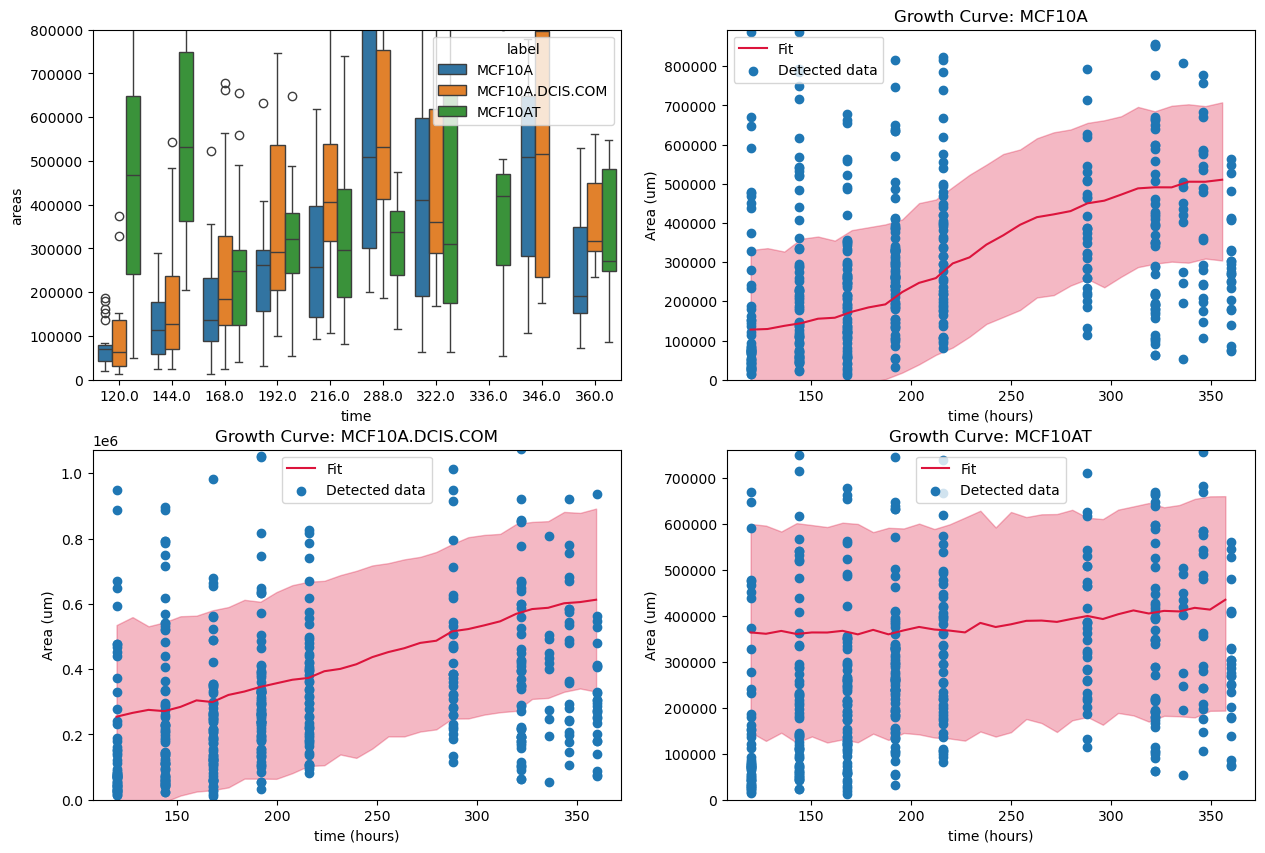

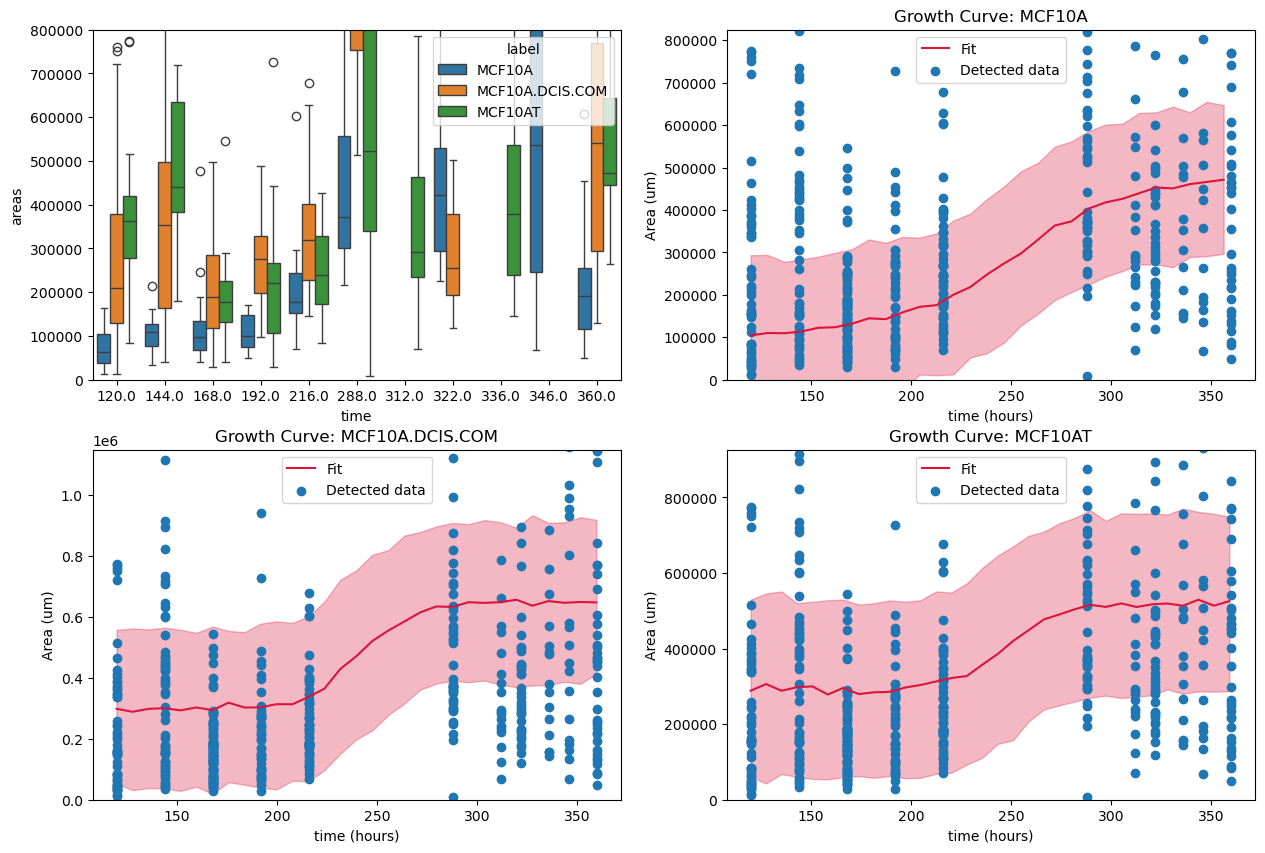

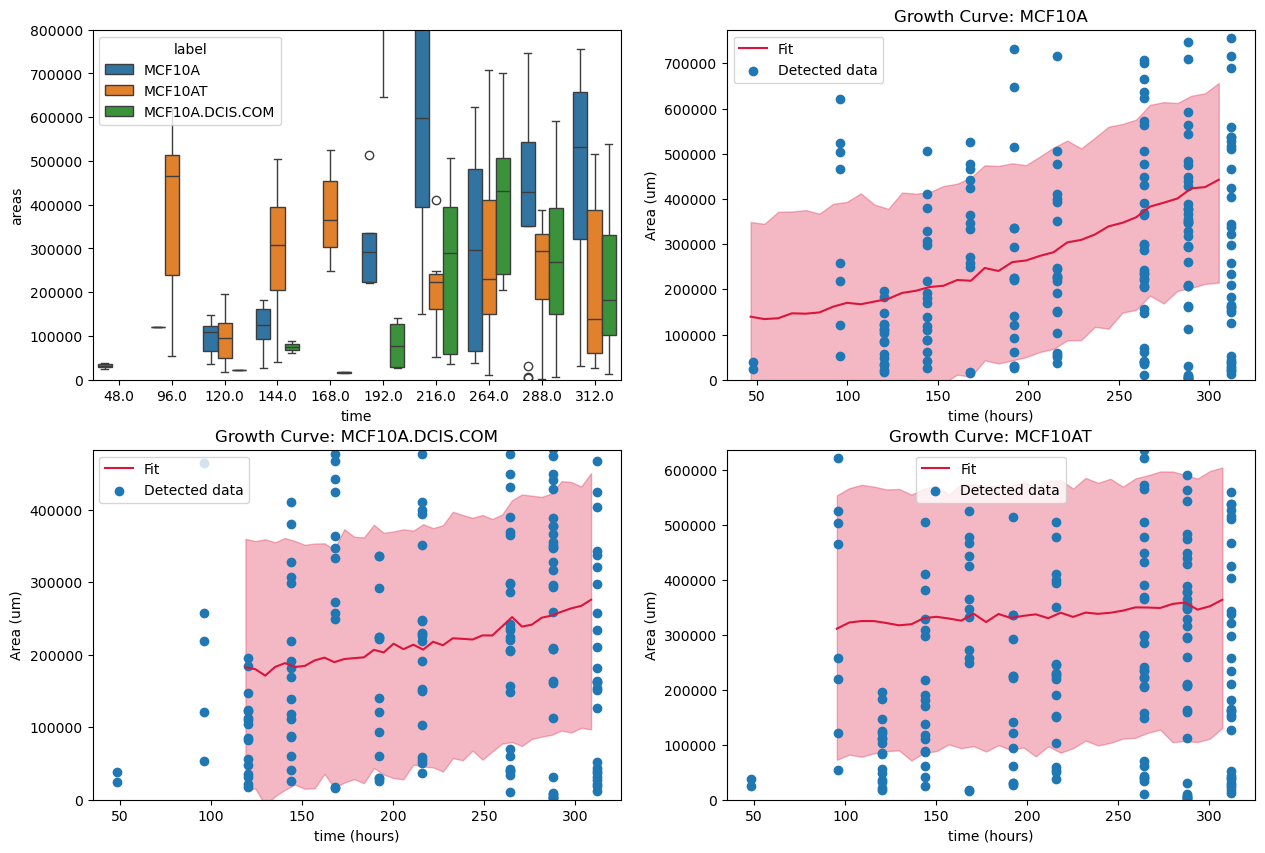

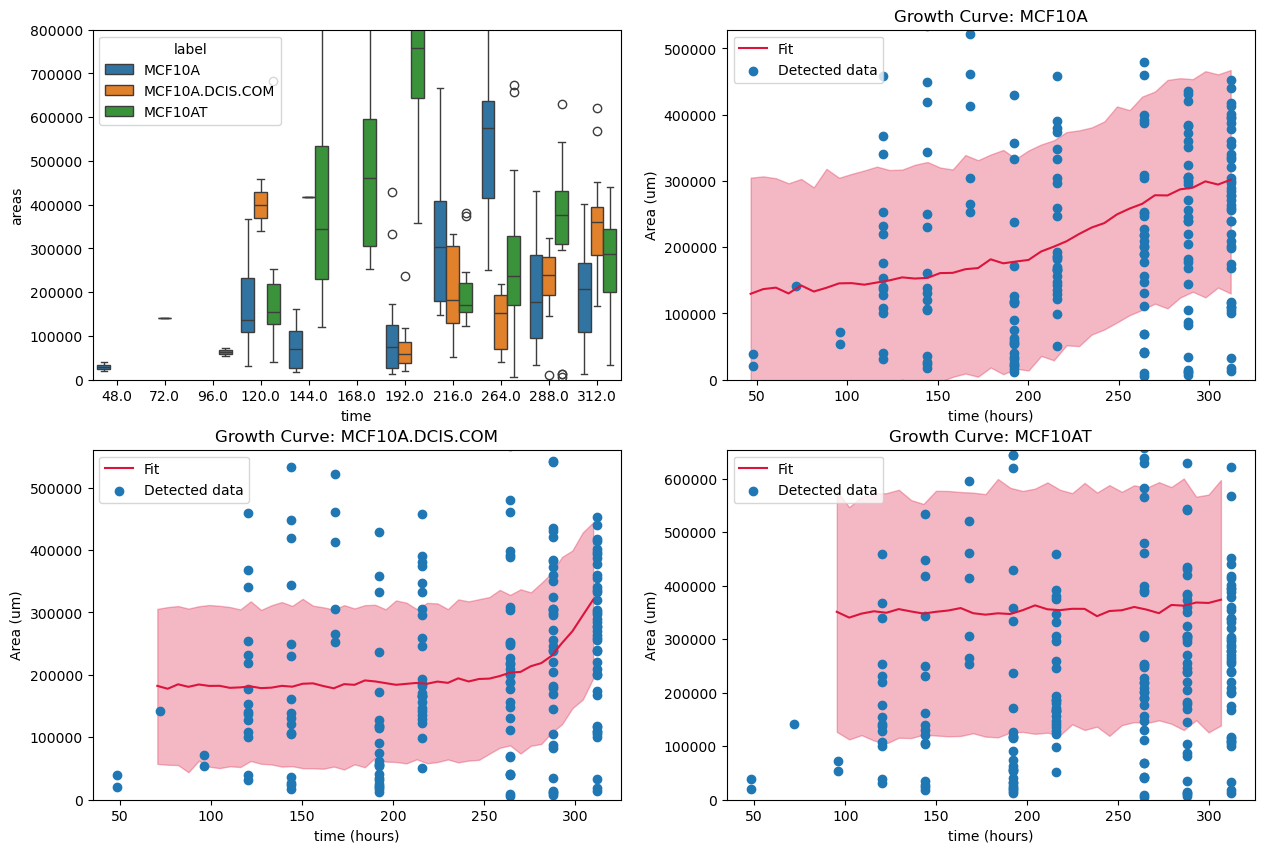

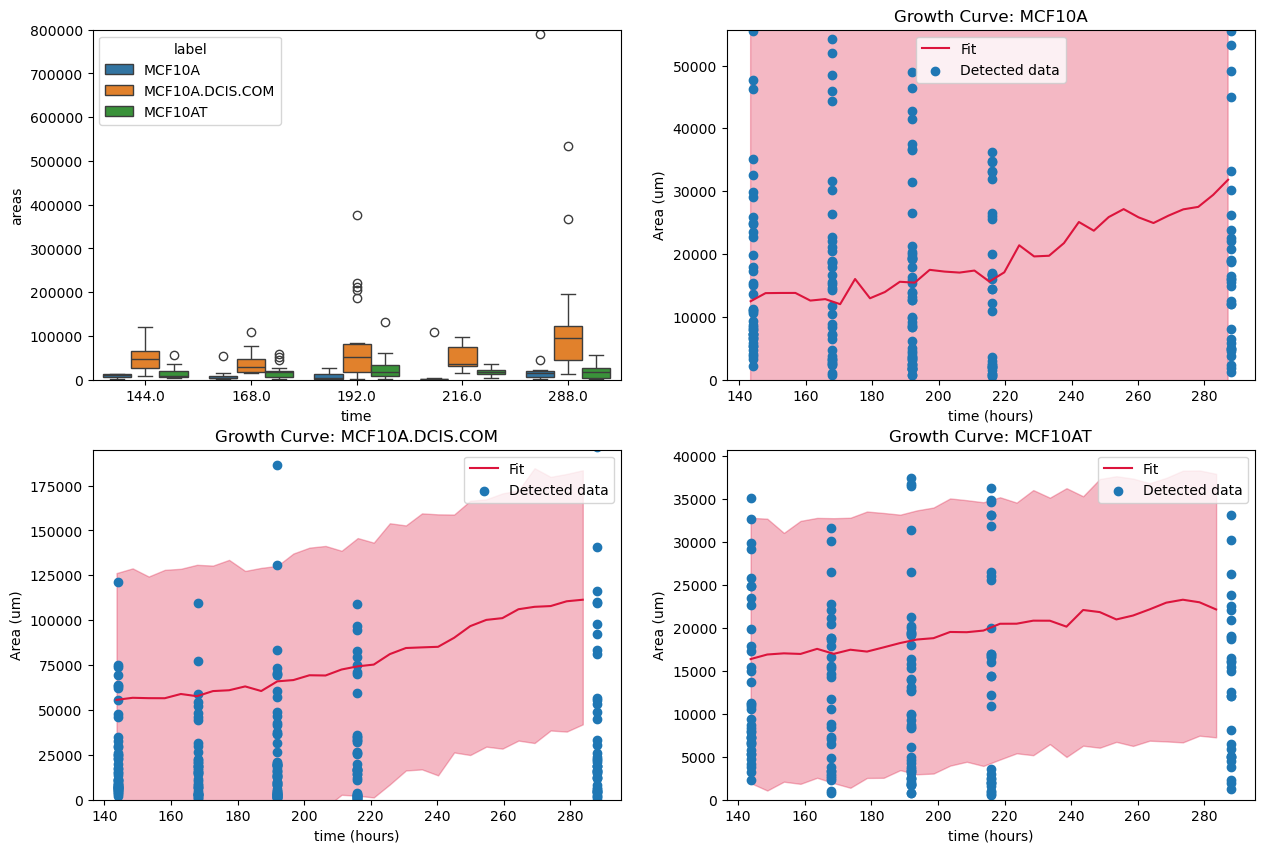

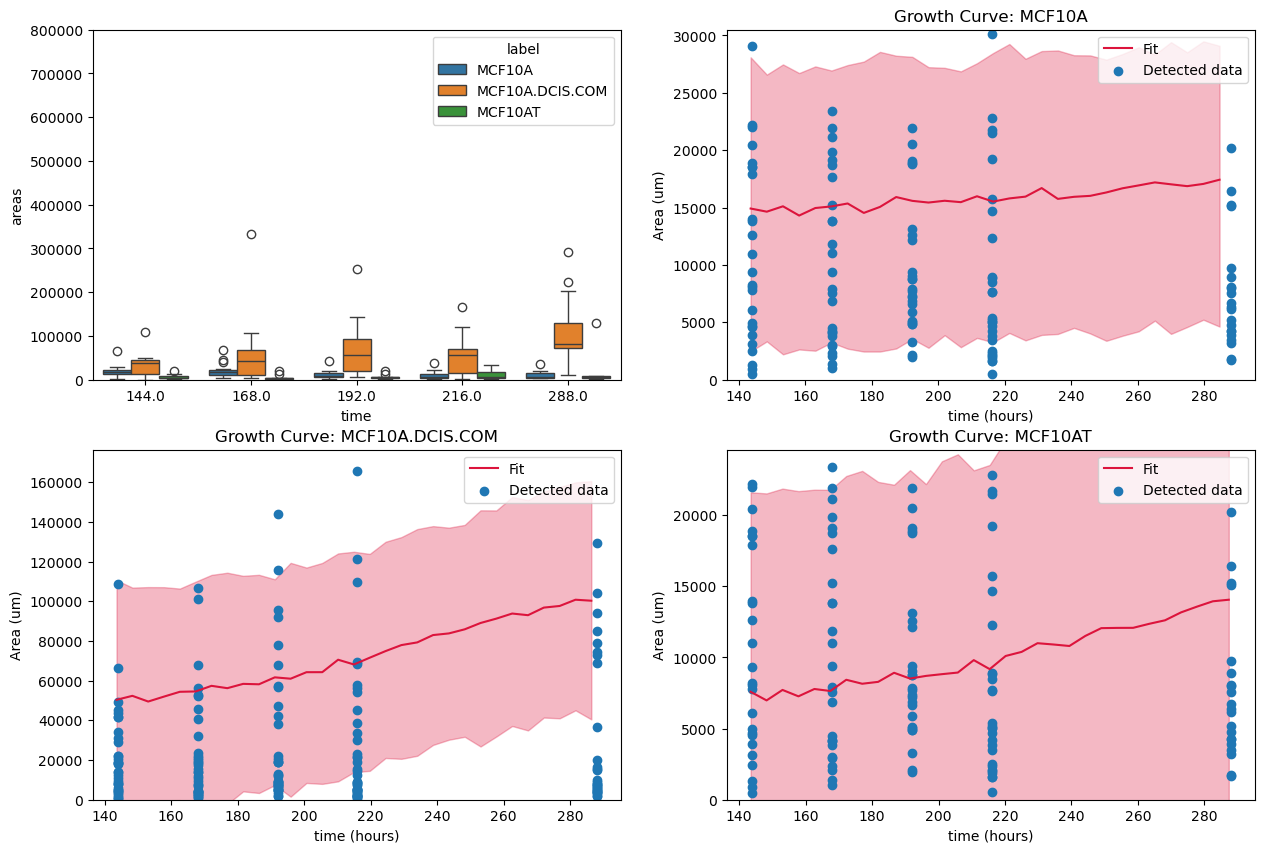

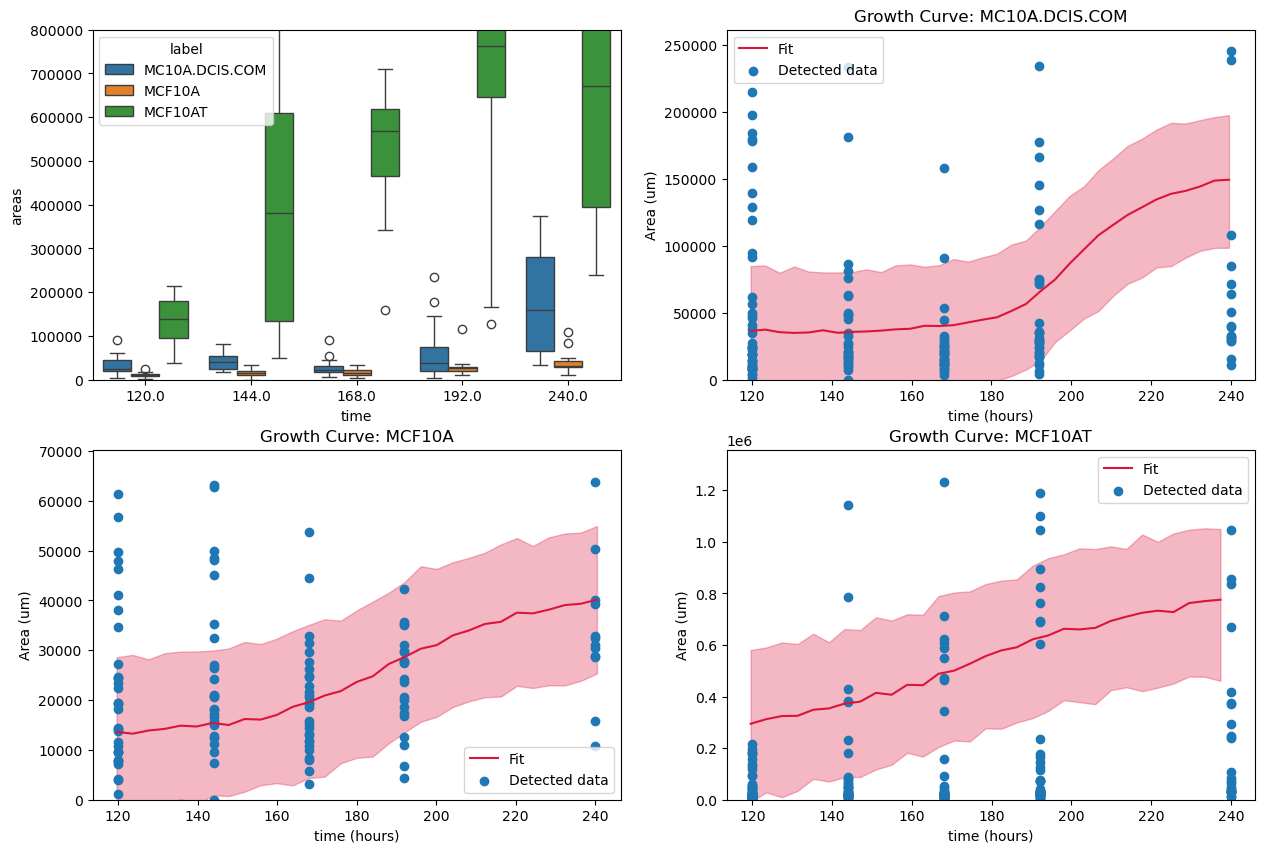

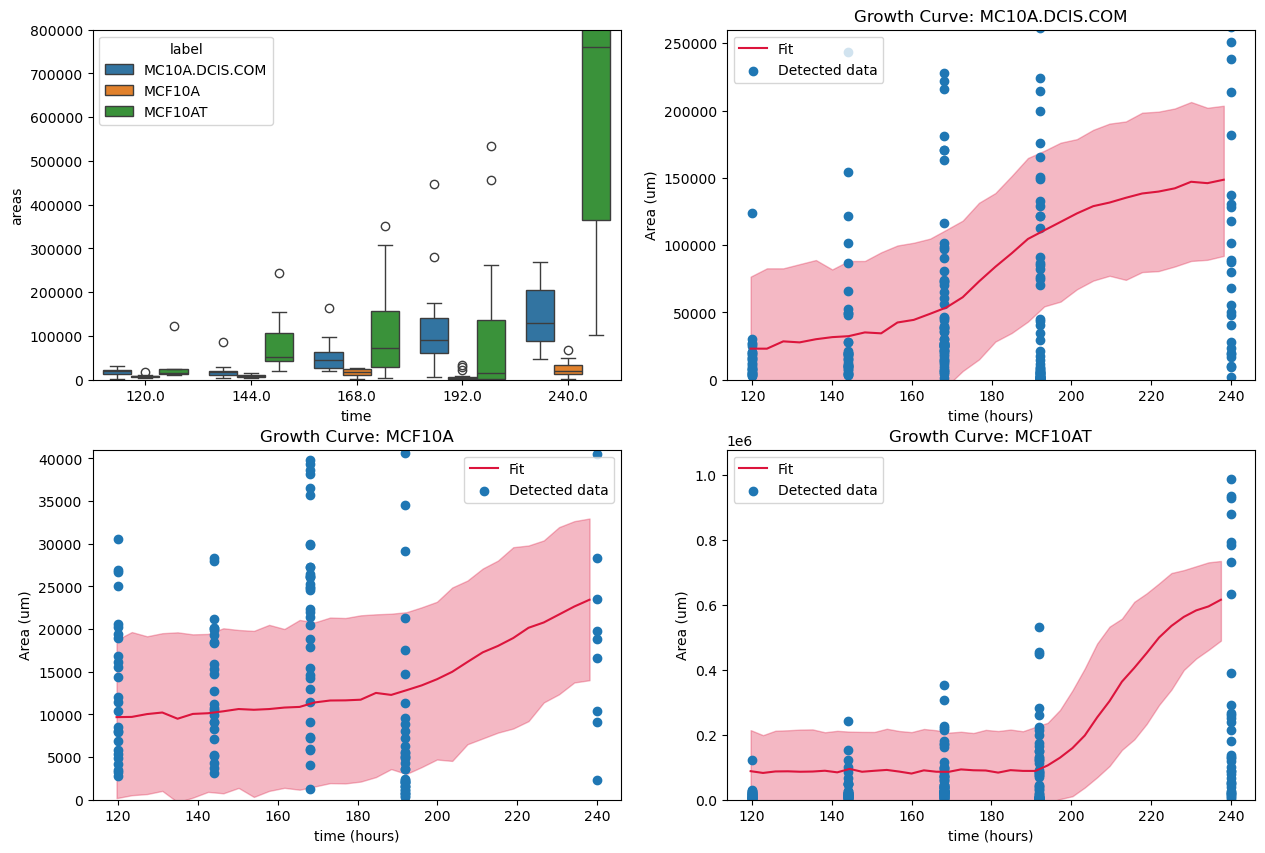

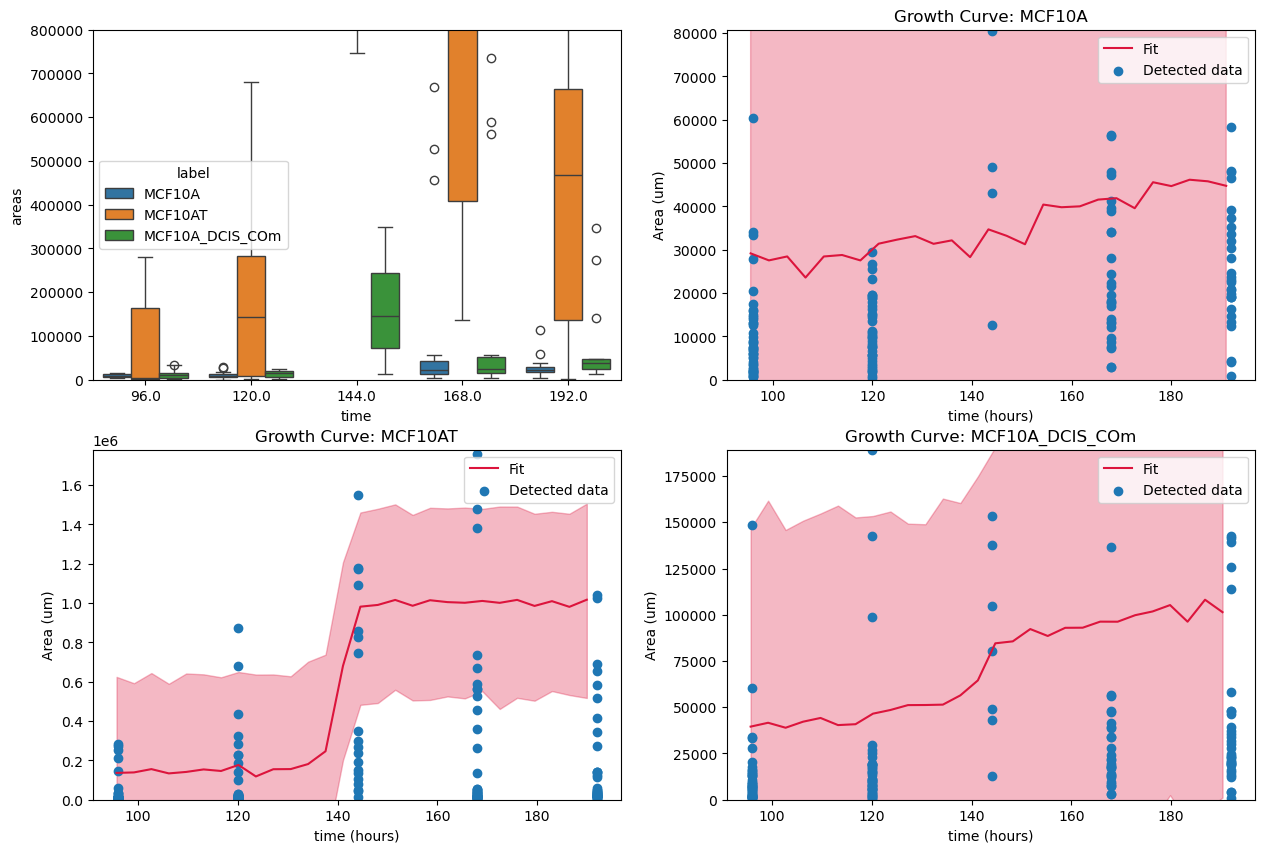

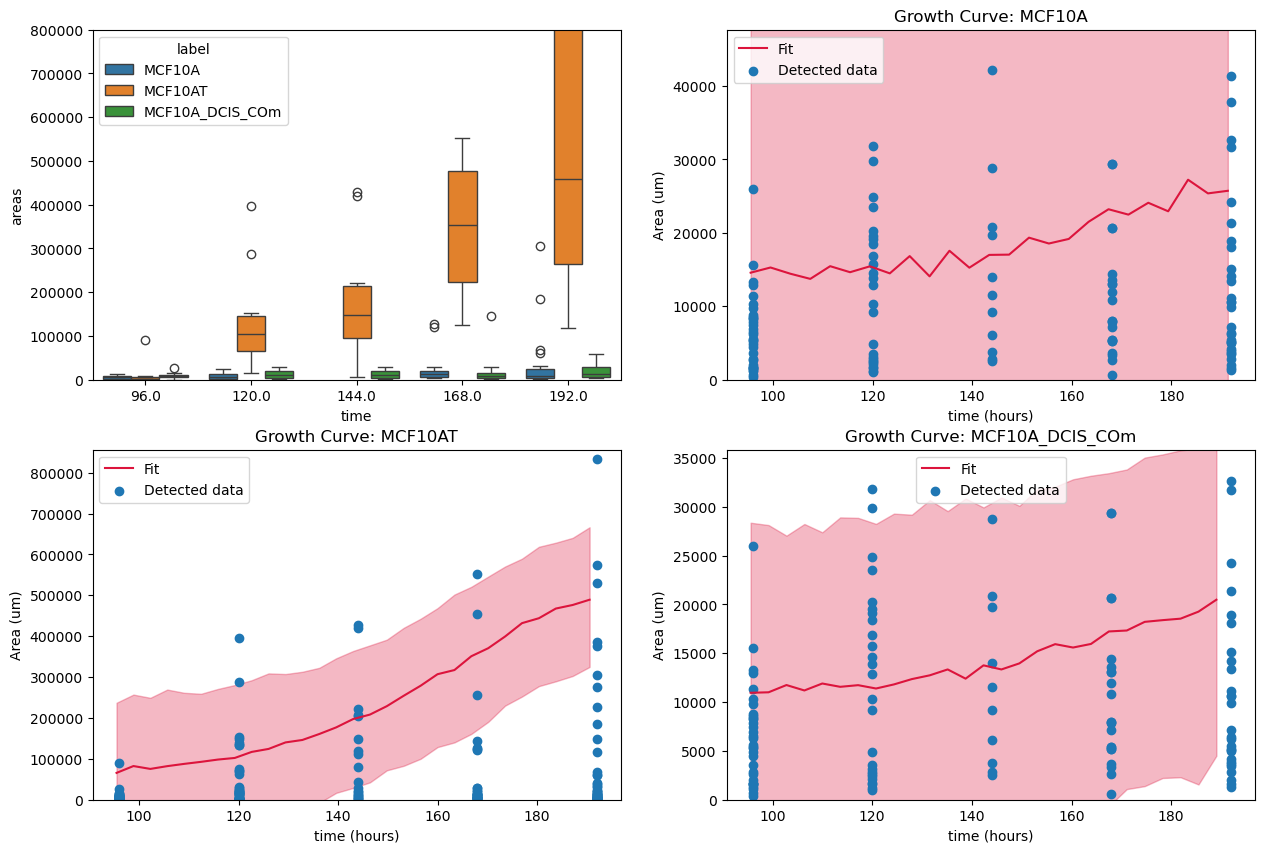

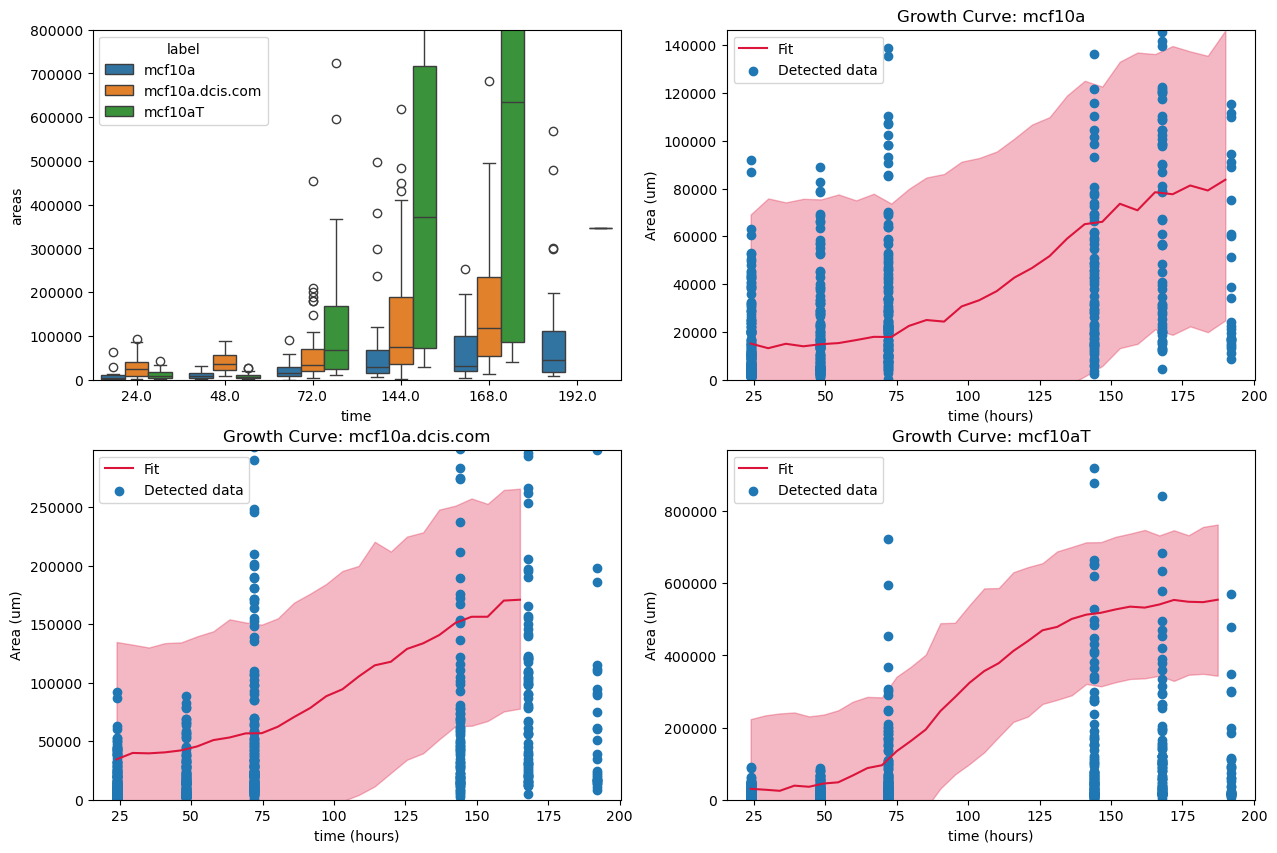

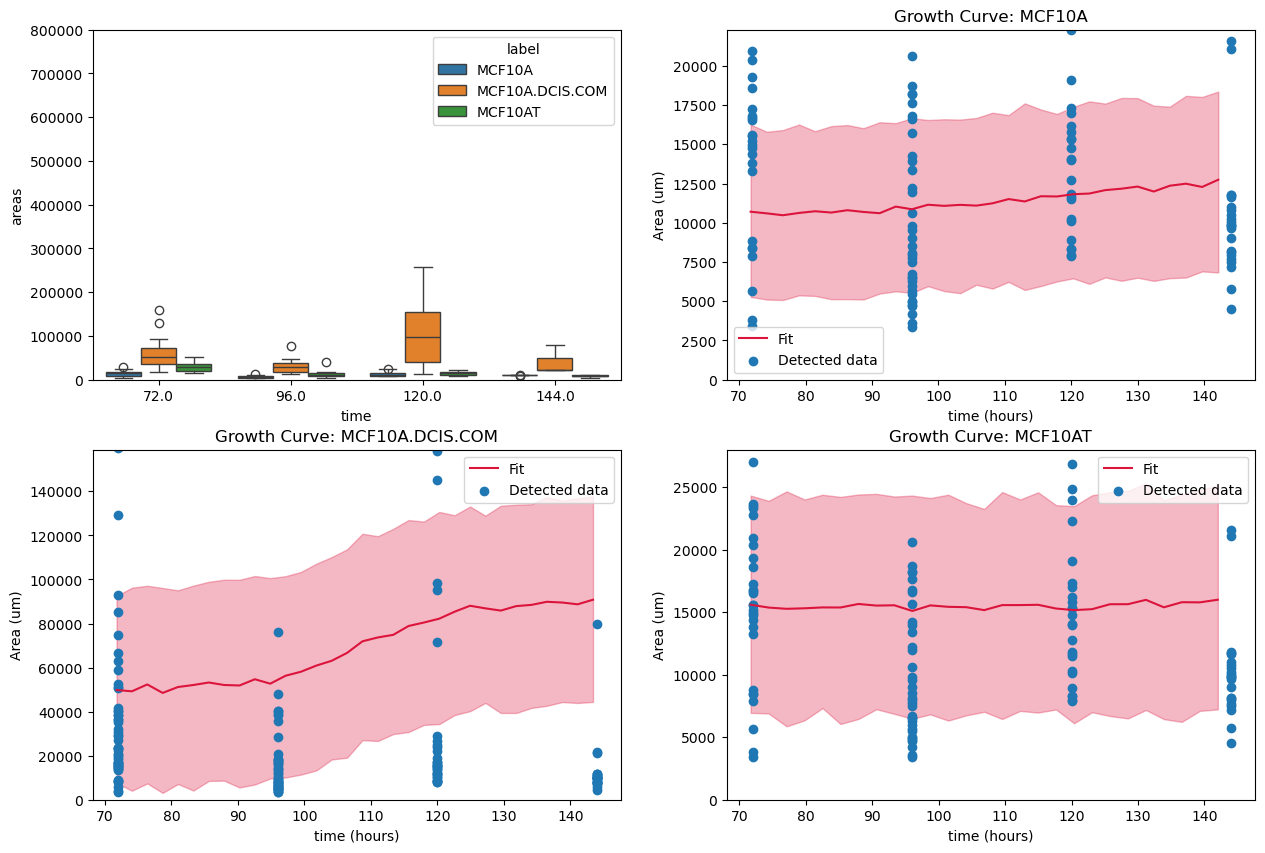

In [6]:
for count,i in enumerate(df_all.groupby(["sample_type", "day", "condition"])):
    datas = i[1]
    fit = create_growth_fits(datas, i[0])


In [ ]:
data_dict.keys()

dict_keys(['path', 'areas', 'perimeter', 'label', 'day', 'conc', 'cnt', 'pixelSize', 'time', 'runNum', 'expr', 'ending', 'condition', 'pw_tot'])

In [ ]:
dict_current.keys()

NameError: name 'dict_current' is not defined

In [ ]:
for count,i in enumerate(df_all.groupby(["sample_type", "day", "condition"])):
    dict_current = i[1].reset_index().to_dict()
    IDs = i[0]
    pca, df_pca, comps = PCA_and_viz(dict_current, "R","label", IDs)
    df_pca.to_csv(os.path.join("./data", "df_pca_{}_{}_{}.csv".format(IDs[0],IDs[1],IDs[2]) ))  

NameError: name 'df_all' is not defined

In r_49 hours, total Explained Variance: 68.46983021249301%


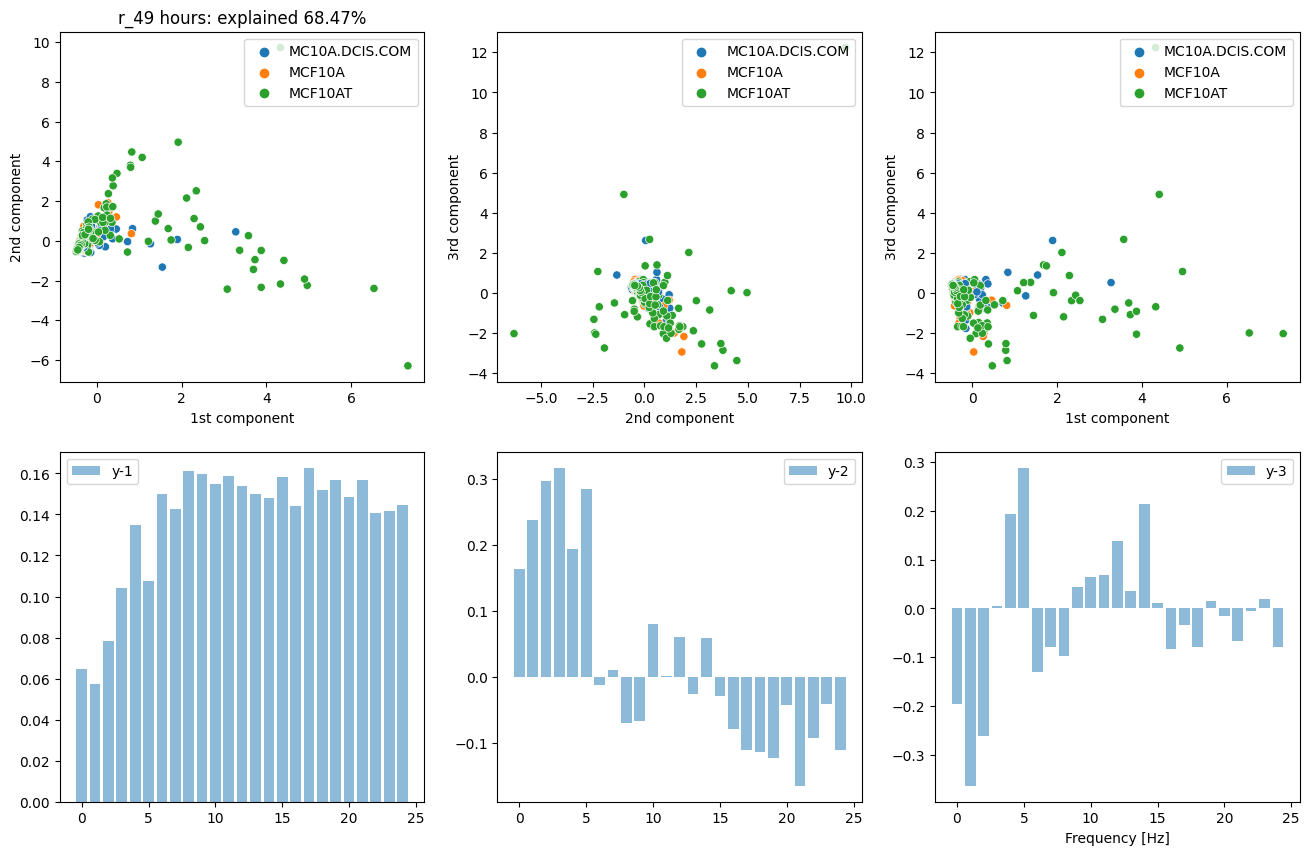

In [9]:
pca, df_pca, comps = PCA_and_viz(data_dict, "R","label") #label #time